# Ishaan Mahendroo - UIN: 327002775



## Problem 1:
Implement a shallow neural network and small deep neural network to fit the functions:
<br>
$f1(x, y) = sin(2πx) sin(2πy)$
<br>
$f2(x, y) =
\begin{cases}
    1 & x > y, \\
    0 & x \leq y.
\end{cases} $

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers

In [ ]:
# define f1 and f2

def f1(x,y):
  return np.sin(2*np.pi*x) * np.sin(2*np.pi*y)

def f2(x,y):
  return np.where(x > y, 1, 0)

In [ ]:
#Generate x and y values (on the unit square [0,1])
num_samples = 1000

X = np.random.rand(num_samples, 2)
y1 = f1(X[:,0], X[:,1])
y2 = f2(X[:,0], X[:,1])

In [ ]:
#shallow network for f1

inputs = keras.Input(shape = (2,))
x = layers.Dense(32, activation = "relu")(inputs)
outputs = layers.Dense(1, activation = 'linear')(x)

shallow_model_f1 = keras.Model(inputs = inputs, outputs = outputs)
shallow_model_f1.compile(optimizer = "Adam", loss = 'mse')

#shallow network for f2
inputs = keras.Input(shape = (2,))
x = layers.Dense(32, activation = "relu")(inputs)
outputs = layers.Dense(1, activation = 'sigmoid')(x)

shallow_model_f2 = keras.Model(inputs = inputs, outputs = outputs)
shallow_model_f2.compile(optimizer = "Adam", loss = 'binary_crossentropy', metrics = ['accuracy'])

Note: the only difference between these 2 models is the activation function in the output layer and the loss function. This is because in f1 we are predicting a continuos value while in f2 we are predicting a classification value

In [ ]:
shallow_model_f1.fit(X,y1, epochs = 250, batch_size = 64)

In [ ]:
shallow_model_f2.fit(X,y2, epochs = 250, batch_size = 64)

In [ ]:
x_test = np.linspace(0, 1, 100)
y_test = np.linspace(0, 1, 100)
x_test, y_test = np.meshgrid(x_test, y_test)
xy_test = np.column_stack((x_test.flatten(), y_test.flatten()))

In [ ]:
f1_shallow_preds = shallow_model_f1.predict(xy_test)
z_pred = f1_shallow_preds.reshape(x_test.shape)
z_true = f1(x_test,y_test)

313/313 [==============================] - 1s 2ms/step


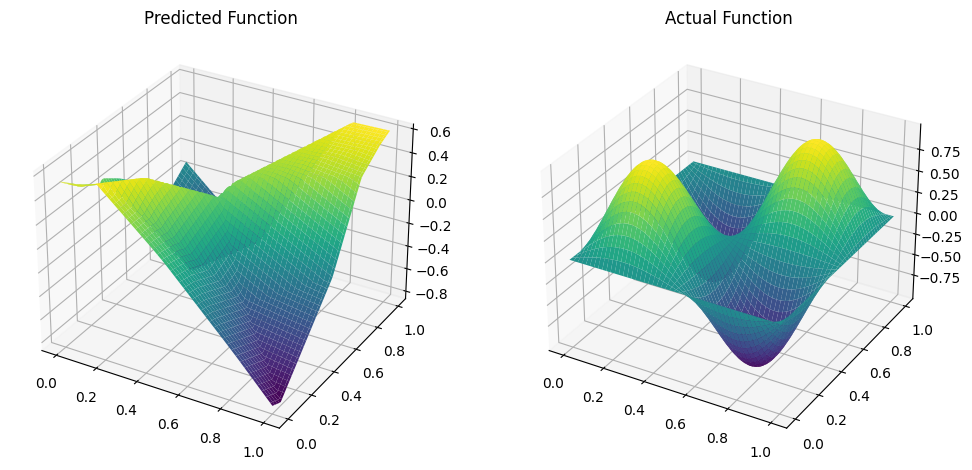

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(x_test, y_test, z_pred, cmap='viridis')
ax1.set_title('Predicted Function')

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(x_test, y_test, z_true, cmap='viridis')
ax2.set_title('Actual Function')

plt.show()

313/313 [==============================] - 1s 2ms/step


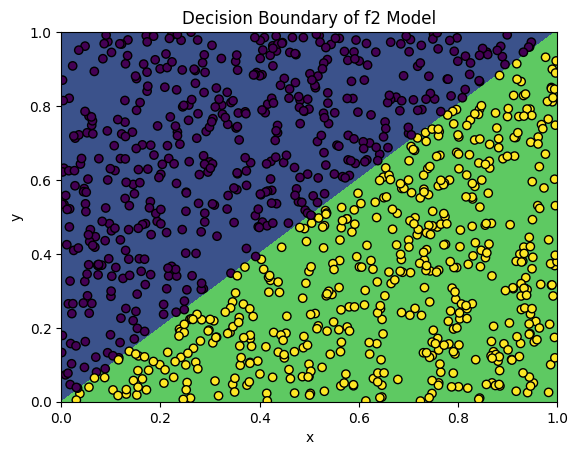

In [ ]:
xx, yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
xy_visualize = np.column_stack((xx.flatten(), yy.flatten()))

f2_shallow_preds = shallow_model_f2.predict(xy_test)
z_pred = f2_shallow_preds.reshape(xx.shape)

plt.contourf(xx, yy, z_pred, cmap='viridis', levels=[0, 0.5, 1])
plt.scatter(X[:, 0], X[:, 1], c=y2, cmap='viridis', edgecolors='k', marker='o')
plt.title('Decision Boundary of f2 Model')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

So with just a simple shallow network we can fit f2 extremely well with near perfect accuracy but we aren't able to fit f1 nearly as well. Can see the general shape of it but not quite there yet. Worth noting that more epochs could achieve a much closer fit for f1 but a deeper network could also help.

313/313 [==============================] - 1s 2ms/step


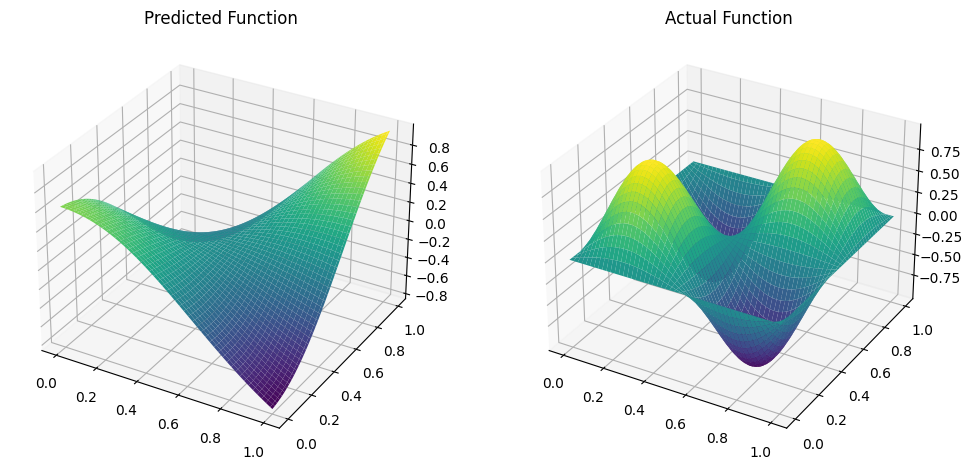

In [ ]:
inputs = keras.Input(shape = (2,))
x = layers.Dense(32, activation = "tanh")(inputs)
outputs = layers.Dense(1, activation = 'linear')(x)

shallow_model_f1 = keras.Model(inputs = inputs, outputs = outputs)
shallow_model_f1.compile(optimizer = "Adam", loss = 'mse')

shallow_model_f1.fit(X,y1, epochs = 500, batch_size = 64, verbose = 0)

f1_shallow_preds = shallow_model_f1.predict(xy_test)
z_pred = f1_shallow_preds.reshape(x_test.shape)
z_true = f1(x_test,y_test)

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(x_test, y_test, z_pred, cmap='viridis')
ax1.set_title('Predicted Function')

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(x_test, y_test, z_true, cmap='viridis')
ax2.set_title('Actual Function')

plt.show()

Doubling the epochs and switching the activation function to tanh for f1 results in a much smoother output that is a bit closer again to the actual function.

In [ ]:
#deep network for f1

inputs = keras.Input(shape = (2,))
x = layers.Dense(64, activation = "relu")(inputs)
x = layers.Dense(32, activation = "relu")(x)
x = layers.Dense(16, activation = "relu")(x)
outputs = layers.Dense(1, activation = 'linear')(x)

deep_model_f1 = keras.Model(inputs = inputs, outputs = outputs)
deep_model_f1.compile(optimizer = "Adam", loss = 'mse')

deep_model_f1.fit(X,y1, epochs = 150, batch_size = 64)

313/313 [==============================] - 1s 2ms/step


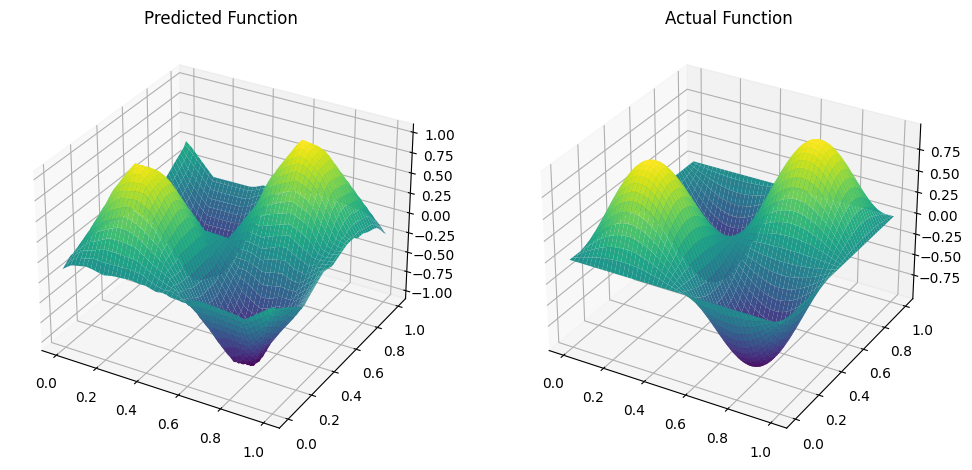

In [ ]:
f1_deep_preds = deep_model_f1.predict(xy_test)
z_pred = f1_deep_preds.reshape(x_test.shape)
z_true = f1(x_test,y_test)

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(x_test, y_test, z_pred, cmap='viridis')
ax1.set_title('Predicted Function')

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(x_test, y_test, z_true, cmap='viridis')
ax2.set_title('Actual Function')

plt.show()

With a deeper network, it is clear how much closer we can get to the actual function, it is still pretty rigid since I am using ReLU in each layer but the approximation appears close regardless. Not only that, but this was after just 150 epochs compared to the previous 500 epochs. So in less iterations it got a better approximation due to the increased depth of the model.

313/313 [==============================] - 2s 5ms/step


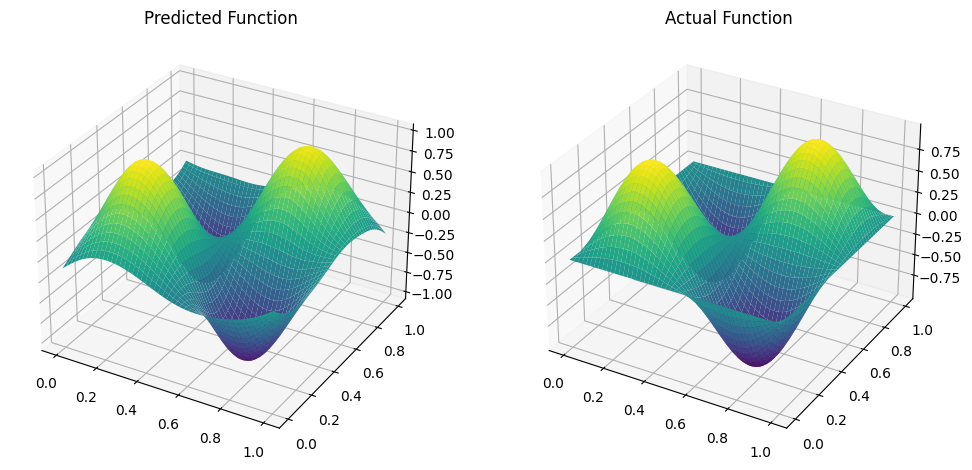

In [ ]:
inputs = keras.Input(shape = (2,))
x = layers.Dense(64, activation = "tanh")(inputs)
x = layers.Dense(32, activation = "tanh")(x)
x = layers.Dense(16, activation = "tanh")(x)
outputs = layers.Dense(1, activation = 'linear')(x)

deep_model_f1 = keras.Model(inputs = inputs, outputs = outputs)
deep_model_f1.compile(optimizer = "Adam", loss = 'mse')

deep_model_f1.fit(X,y1, epochs = 150, batch_size = 64, verbose = 0)

f1_deep_preds = deep_model_f1.predict(xy_test)
z_pred = f1_deep_preds.reshape(x_test.shape)
z_true = f1(x_test,y_test)

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(x_test, y_test, z_pred, cmap='viridis')
ax1.set_title('Predicted Function')

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(x_test, y_test, z_true, cmap='viridis')
ax2.set_title('Actual Function')

plt.show()

With tanh as the activation function we can see it is nearly perfectly predicting the desired function. With only 3 layers and not super wide layers we can approximate this function extremely well. It is also worth noting that the function was only trained on 1000 samples, showing it does not require an immense amount of data to fit these functions

Epoch 1/50
16/16 [==============================] - 1s 4ms/step - loss: 0.6685 - accuracy: 0.6390
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 0.5906 - accuracy: 0.8930
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 0.5033 - accuracy: 0.8980
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.4067 - accuracy: 0.9400
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.3155 - accuracy: 0.9710
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.2408 - accuracy: 0.9820
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1881 - accuracy: 0.9840
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1504 - accuracy: 0.9890
Epoch 9/50
16/16 [==============================] - 0s 4ms/step - loss: 0.1264 - accuracy: 0.9860
Epoch 10/50
16/16 [==============================] - 0s 4ms/step - loss: 0.1084 - accuracy: 0.9900
Epoch 11/50
16/16 [

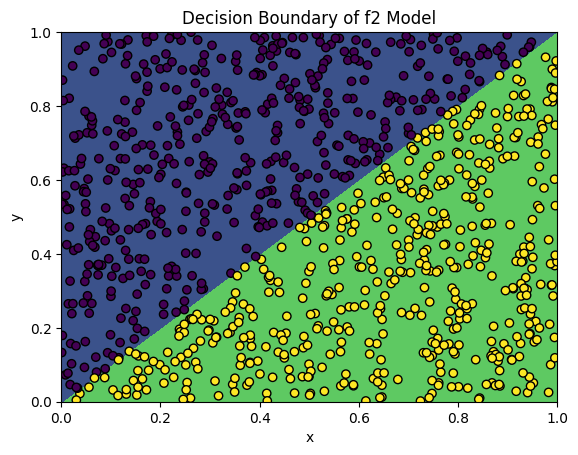

In [ ]:
#deep network for f2

inputs = keras.Input(shape = (2,))
x = layers.Dense(64, activation = "relu")(inputs)
x = layers.Dense(32, activation = "relu")(x)
x = layers.Dense(16, activation = "relu")(x)
outputs = layers.Dense(1, activation = 'sigmoid')(x)

deep_model_f2 = keras.Model(inputs = inputs, outputs = outputs)
deep_model_f2.compile(optimizer = "Adam", loss = 'binary_crossentropy', metrics = ['accuracy'])

deep_model_f2.fit(X,y2, epochs = 50, batch_size = 64)

f2_deep_preds = deep_model_f2.predict(xy_test)
z_pred = f2_deep_preds.reshape(xx.shape)

plt.contourf(xx, yy, z_pred, cmap='viridis', levels=[0, 0.5, 1])
plt.scatter(X[:, 0], X[:, 1], c=y2, cmap='viridis', edgecolors='k', marker='o')
plt.title('Decision Boundary of f2 Model')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

A deeper model for f2 isn't really necessary because we already perfectly classified the data with the simple model. We can see that the accuracy got up to 99% after only the 10th epoch. Since this is such a simple, clearly linearly seperable dataset a neural network most likely wouldnt even be necessary but this shows how it can approximate nearly anything with just shallow network.

# Problem 2
Design, implement and train a convolutional neural net-
work for classification on the MNIST dataset of handwritten images. Test dif-
ferent architectures and training hyperparameters in an effort to improve the
test accuracy. Repeat this exercise on the CIFAR-10 dataset as well



In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt

### MNIST MODEL

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


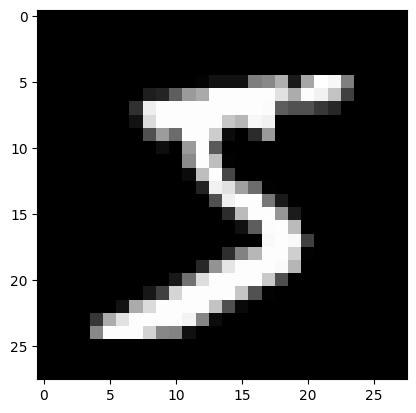

In [ ]:
plt.imshow(X_train[0], cmap = 'gray')

In [ ]:
print(y_train[0])

5


Mnist is imported, we can see what the images look like being 28x28 images of handwritten digits with the corresponding y value being the digit.

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

(60000, 28, 28)
(60000,)
(10000, 28, 28)


In [ ]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.33, random_state = 42)

In [ ]:
print(X_train.shape)
print(X_val.shape)

(40200, 28, 28, 1)
(19800, 28, 28, 1)


The data has been appropriately reshaped to feed into the tensorflow model, and the data has been normalized so we deal with smaller values to make things easier as well.

In [ ]:
inputs = keras.Input(shape = (28,28,1))
x = layers.Conv2D(filters = 32, kernel_size = 3, activation = "relu")(inputs)
x = layers.MaxPooling2D(pool_size = 2)(x)
x = layers.Conv2D(filters = 64, kernel_size = 3, activation = "relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation = "softmax")(x)

model = keras.Model(inputs = inputs, outputs = outputs)
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

Since the images are small and simple I started with a relatively simple model of only 2 Convolution layers and 2 Max pool layers. Also note that the loss function is "sparse_categorical_crossentropy", this is because I did not change the y values at all by one hot encoding them, I just left them as single numbers.

In [ ]:
history = model.fit(X_train, y_train, epochs = 10, batch_size = 128, validation_data=(X_val, y_val))

Epoch 1/10
315/315 [==============================] - 14s 7ms/step - loss: 0.2763 - accuracy: 0.9191 - val_loss: 0.1011 - val_accuracy: 0.9699
Epoch 2/10
315/315 [==============================] - 2s 6ms/step - loss: 0.0753 - accuracy: 0.9775 - val_loss: 0.0779 - val_accuracy: 0.9772
Epoch 3/10
315/315 [==============================] - 2s 5ms/step - loss: 0.0531 - accuracy: 0.9841 - val_loss: 0.0570 - val_accuracy: 0.9820
Epoch 4/10
315/315 [==============================] - 2s 6ms/step - loss: 0.0408 - accuracy: 0.9872 - val_loss: 0.0511 - val_accuracy: 0.9846
Epoch 5/10
315/315 [==============================] - 2s 6ms/step - loss: 0.0315 - accuracy: 0.9905 - val_loss: 0.0628 - val_accuracy: 0.9807
Epoch 6/10
315/315 [==============================] - 2s 6ms/step - loss: 0.0255 - accuracy: 0.9922 - val_loss: 0.0483 - val_accuracy: 0.9862
Epoch 7/10
315/315 [==============================] - 2s 6ms/step - loss: 0.0216 - accuracy: 0.9932 - val_loss: 0.0526 - val_accuracy: 0.9851
Epoch

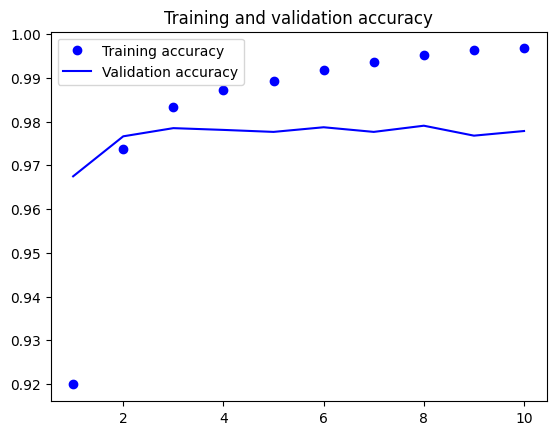

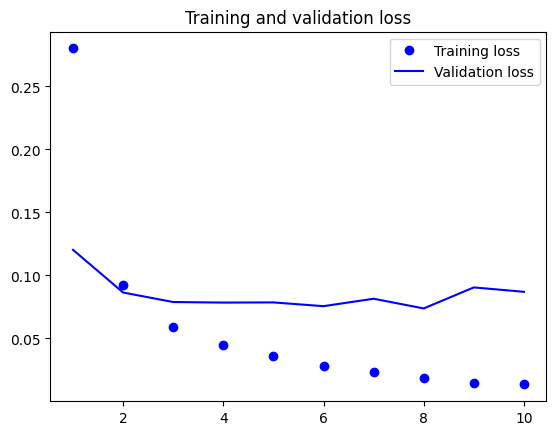

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

As we can see, 10 epochs was a few too many, it seems the bester performing model was at around 8 epochs before the validation loss starts increasing and the validation accuracy starts falling. However the accuracy is extremely high, we can see that with just a simple model with 4 Convolutional/MaxPooling layers and one flatten then dense layer to classify can basically perfectly classify the MNIST digits. With CiFAR the challenge may be a bit higher since they are colored images as well.

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0375 - accuracy: 0.9882


[0.037490908056497574, 0.9882000088691711]

As we can see, it performs extremely well on the test set as well, I belive it's because MNIST is so simple only being 28x28 grayscale images.

### CIFAR10 MODEL

In [ ]:
(X, y), (X_test, y_test) = keras.datasets.cifar10.load_data()

In [ ]:
X.shape

(50000, 32, 32, 3)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = .2, random_state = 42)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(X_test.shape)

(40000, 32, 32, 3)
(40000, 1)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


[6]


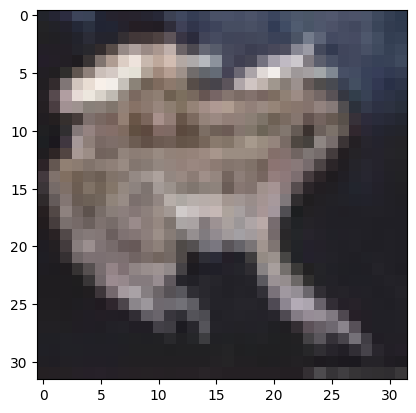

In [ ]:
plt.imshow(X_train[0])
print(y_train[0])

0-airplane,
1-automobile,
2-bird,
3-cat,
4-deer,
5-dog,
6-frog,
7-horse,
8-ship,
9-truck

In [ ]:
inputs = keras.Input(shape = (32,32,3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters = 32, kernel_size = 3, activation = "relu")(x)
x = layers.MaxPooling2D(pool_size = 2)(x)
x = layers.Conv2D(filters = 64, kernel_size = 3, activation = "relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation = "softmax")(x)

model = keras.Model(inputs = inputs, outputs = outputs)
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs = 20, batch_size = 128, validation_data=(X_val, y_val))

Epoch 1/20
313/313 [==============================] - 8s 8ms/step - loss: 1.5498 - accuracy: 0.4471 - val_loss: 1.3176 - val_accuracy: 0.5349
Epoch 2/20
313/313 [==============================] - 2s 6ms/step - loss: 1.2135 - accuracy: 0.5777 - val_loss: 1.1886 - val_accuracy: 0.5835
Epoch 3/20
313/313 [==============================] - 2s 6ms/step - loss: 1.0826 - accuracy: 0.6234 - val_loss: 1.0709 - val_accuracy: 0.6353
Epoch 4/20
313/313 [==============================] - 2s 5ms/step - loss: 0.9897 - accuracy: 0.6569 - val_loss: 1.0140 - val_accuracy: 0.6481
Epoch 5/20
313/313 [==============================] - 2s 5ms/step - loss: 0.9131 - accuracy: 0.6870 - val_loss: 0.9710 - val_accuracy: 0.6642
Epoch 6/20
313/313 [==============================] - 2s 7ms/step - loss: 0.8570 - accuracy: 0.7077 - val_loss: 1.0064 - val_accuracy: 0.6528
Epoch 7/20
313/313 [==============================] - 2s 6ms/step - loss: 0.8083 - accuracy: 0.7245 - val_loss: 0.9639 - val_accuracy: 0.6661
Epoch 

I used the simple model from the MNIST section as my baseline to see how it would preform on the slightly more complex CIFAR images that are now 32x32 and have 3 channels for the 3 colors. As we can see based on the validation performance it plateud around 68%. I believe this is because the model couldn't learn all of the key features necessary to predict, we see the train accuracy continues to climb but this is most likely attributed to the model memorizing the training set. I will try to make the model more complex. Also note, I included the rescaling layer within the model this time rather than rescaling the data prior to inputting in the model. It should have the same effect as before since it is the first layer in the model. I also left everything to the "standard" options in the sense that I didn't alter the learning rate from 0.001 and just used adam as the optimizer, I left all activation functions as relu, and continued using sparse categorical cross entropy. I did this because I primarily wanted to see how altering the structure of the network would change its performance before tuning more of the hyperparameters.

In [ ]:
inputs = keras.Input(shape = (32,32,3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters = 32, kernel_size = 3, activation = "relu", padding = "same")(x)
x = layers.Conv2D(filters = 32, kernel_size = 3, activation = "relu", padding = "same")(x)
x = layers.MaxPooling2D(pool_size = 2)(x)
x = layers.Conv2D(filters = 64, kernel_size = 3, padding = "same", activation = "relu")(x)
x = layers.Conv2D(filters = 64, kernel_size = 3, padding = "same", activation = "relu")(x)
x = layers.MaxPooling2D(pool_size = 2)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation = "softmax")(x)
model = keras.Model(inputs = inputs, outputs = outputs)
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 rescaling_9 (Rescaling)     (None, 32, 32, 3)         0         
                                                                 
 conv2d_32 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_33 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_34 (Conv2D)          (None, 16, 16, 64)        18496     
                                                           

Since the images are so small, I felt in the initial model the "boarder effect" occuring when I would perform the 2D convolutions on the image might remove some key information so I changed the padding to same. Since I also thought that the previous model couldn't capture the necessary features I also added another Convolution layer to each "block" of my model where a block is now 2 convolutional layers and 1 max pooling layer. When looking at the summary, we can see the image size only changes when the max pooling occurs, so my hope is that in the initial block I capture the small local features and in the 2nd block I capture more global features after doing the first max pool layer.

In [ ]:
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs = 20, batch_size = 128, validation_data=(X_val, y_val))

Epoch 1/20
313/313 [==============================] - 9s 12ms/step - loss: 1.5426 - accuracy: 0.4437 - val_loss: 1.2745 - val_accuracy: 0.5569
Epoch 2/20
313/313 [==============================] - 3s 10ms/step - loss: 1.1482 - accuracy: 0.5949 - val_loss: 1.0527 - val_accuracy: 0.6334
Epoch 3/20
313/313 [==============================] - 3s 10ms/step - loss: 0.9658 - accuracy: 0.6619 - val_loss: 0.9412 - val_accuracy: 0.6773
Epoch 4/20
313/313 [==============================] - 3s 11ms/step - loss: 0.8492 - accuracy: 0.7049 - val_loss: 0.8901 - val_accuracy: 0.6963
Epoch 5/20
313/313 [==============================] - 3s 10ms/step - loss: 0.7659 - accuracy: 0.7337 - val_loss: 0.7993 - val_accuracy: 0.7277
Epoch 6/20
313/313 [==============================] - 3s 10ms/step - loss: 0.6894 - accuracy: 0.7612 - val_loss: 0.8414 - val_accuracy: 0.7064
Epoch 7/20
313/313 [==============================] - 3s 10ms/step - loss: 0.6271 - accuracy: 0.7846 - val_loss: 0.7717 - val_accuracy: 0.7367

This model performed better than the previous one managing to get around 75% validation accuracy in the best performing one. So increasing the depth did help however the model is now overfitting quicker, we can see that around epoch 10-11 is where the validation loss stops going down and starts going up.

In [ ]:
inputs = keras.Input(shape = (32,32,3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters = 32, kernel_size = 3, activation = "relu", padding = "same")(x)
x = layers.Conv2D(filters = 32, kernel_size = 3, activation = "relu", padding = "same")(x)
x = layers.MaxPooling2D(pool_size = 2)(x)
x = layers.Dropout(0.2)(x)
x = layers.Conv2D(filters = 64, kernel_size = 3, padding = "same", activation = "relu")(x)
x = layers.Conv2D(filters = 64, kernel_size = 3, padding = "same", activation = "relu")(x)
x = layers.MaxPooling2D(pool_size = 2)(x)
x = layers.Dropout(0.2)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation = "softmax")(x)
model = keras.Model(inputs = inputs, outputs = outputs)

model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 rescaling_10 (Rescaling)    (None, 32, 32, 3)         0         
                                                                 
 conv2d_36 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_37 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                           

In this iteration, I kept the structure the exact same as the previous model but I added 2 dropout layers as well. The hope is that these layers will prevent overfitting by randomly shutting down nodes with a probability of 0.2.

In [ ]:
history = model.fit(X_train, y_train, epochs = 20, batch_size = 128, validation_data=(X_val, y_val))

Epoch 1/20
313/313 [==============================] - 7s 14ms/step - loss: 1.6138 - accuracy: 0.4164 - val_loss: 1.2914 - val_accuracy: 0.5379
Epoch 2/20
313/313 [==============================] - 4s 14ms/step - loss: 1.2173 - accuracy: 0.5702 - val_loss: 1.0698 - val_accuracy: 0.6252
Epoch 3/20
313/313 [==============================] - 4s 13ms/step - loss: 1.0275 - accuracy: 0.6393 - val_loss: 0.9323 - val_accuracy: 0.6755
Epoch 4/20
313/313 [==============================] - 4s 13ms/step - loss: 0.9095 - accuracy: 0.6825 - val_loss: 0.8721 - val_accuracy: 0.6965
Epoch 5/20
313/313 [==============================] - 4s 14ms/step - loss: 0.8367 - accuracy: 0.7082 - val_loss: 0.8130 - val_accuracy: 0.7206
Epoch 6/20
313/313 [==============================] - 4s 13ms/step - loss: 0.7803 - accuracy: 0.7278 - val_loss: 0.7882 - val_accuracy: 0.7279
Epoch 7/20
313/313 [==============================] - 4s 13ms/step - loss: 0.7331 - accuracy: 0.7456 - val_loss: 0.7457 - val_accuracy: 0.7426

This model performed slightly better than the previous one, getting accuracy on the validation set of up to 77%, so adding some dropout helped.

In [ ]:
inputs = keras.Input(shape = (32,32,3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters = 32, kernel_size = 3, activation = "relu", padding = "same")(x)
x = layers.Conv2D(filters = 32, kernel_size = 3, activation = "relu", padding = "same")(x)
x = layers.MaxPooling2D(pool_size = 2)(x)
x = layers.Dropout(0.2)(x)
x = layers.Conv2D(filters = 64, kernel_size = 3, padding = "same", activation = "relu")(x)
x = layers.Conv2D(filters = 64, kernel_size = 3, padding = "same", activation = "relu")(x)
x = layers.MaxPooling2D(pool_size = 2)(x)
x = layers.Dropout(0.2)(x)
x = layers.Conv2D(filters = 128, kernel_size = 3, padding = "same", activation = "relu")(x)
x = layers.Conv2D(filters = 128, kernel_size = 3, padding = "same", activation = "relu")(x)
x = layers.MaxPooling2D(pool_size = 2)(x)
x = layers.Dropout(0.2)(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation = "relu")(x)
outputs = layers.Dense(10, activation = "softmax")(x)
model = keras.Model(inputs = inputs, outputs = outputs)

model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 rescaling_12 (Rescaling)    (None, 32, 32, 3)         0         
                                                                 
 conv2d_46 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_47 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_5 (Dropout)         (None, 16, 16, 32)        0         
                                                           

In the final attempt, I added a 3rd block to my model this time with 128 filters, the goal was to see if increasing the depth some more could provide higher accuracy. I also included a final dense layer at the end, I did this because looking at other people's models it seems like common practice to include another dense layer before the output layer where I do the softmax approximation. I wanted to see if this addiditional layer would also add some benefit.

In [ ]:
history = model.fit(X_train, y_train, epochs = 20, batch_size = 128, validation_data=(X_val, y_val))

Epoch 1/20
313/313 [==============================] - 9s 18ms/step - loss: 1.6873 - accuracy: 0.3773 - val_loss: 1.3991 - val_accuracy: 0.4831
Epoch 2/20
313/313 [==============================] - 5s 16ms/step - loss: 1.2181 - accuracy: 0.5615 - val_loss: 1.1288 - val_accuracy: 0.5981
Epoch 3/20
313/313 [==============================] - 5s 17ms/step - loss: 1.0110 - accuracy: 0.6398 - val_loss: 0.9095 - val_accuracy: 0.6798
Epoch 4/20
313/313 [==============================] - 5s 16ms/step - loss: 0.8744 - accuracy: 0.6886 - val_loss: 0.8562 - val_accuracy: 0.7022
Epoch 5/20
313/313 [==============================] - 5s 16ms/step - loss: 0.7696 - accuracy: 0.7297 - val_loss: 0.7333 - val_accuracy: 0.7459
Epoch 6/20
313/313 [==============================] - 5s 18ms/step - loss: 0.6804 - accuracy: 0.7589 - val_loss: 0.6969 - val_accuracy: 0.7571
Epoch 7/20
313/313 [==============================] - 5s 17ms/step - loss: 0.6168 - accuracy: 0.7817 - val_loss: 0.6747 - val_accuracy: 0.7696

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.8251 - accuracy: 0.7870


[0.8250771760940552, 0.7870000004768372]

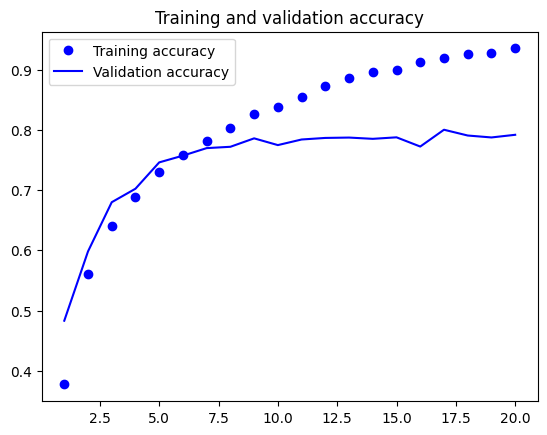

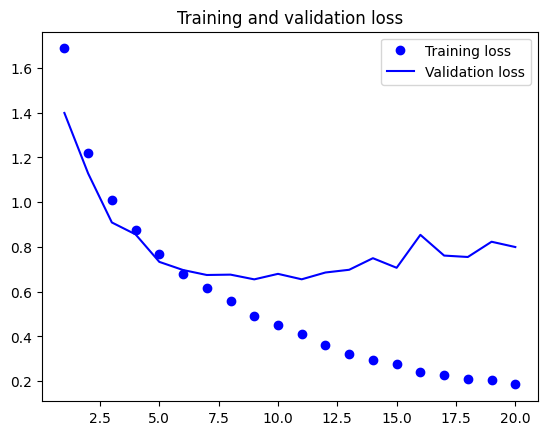

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In this attempt I was able to get a validation accuracy of 80% but the loss wasn't the lowest in this epoch so it isn't clear exactly which of the models at which epoch would technically have performed the best on the test set. I should have included callbacks to save the best model and then try that one on the test set. However this model is still an improvement on the previous ones. Even using the 20 epoch model on the test set I was able to get roughly 79% accuracy. This model can still be fine tuned quite a bit as well of course, as I stated in the beginning my goal was to see how the changes in the structure would alter its performance. I didn't change my optimizer, any activation functions, the number of filters in each layer, the dropout percentage, etc. Optimizing these can definitely increase performance somewhat through some more trial and error. Another thing worth noting is in the final model, the model itself gets pretty deep. A concern to worry about is the vanishing gradient problem, I could also add a residual connection to make sure that is not an issue, adding this residual can also improve model performance especially when going deep. However I believe the structure is pretty good, in practice a common thing to do would be to get a pretrained model, for example ResNet can get extremely high accuracy.

# Problem 4

Design, implement and train a generative adversarial network (GAN) on the MNIST dataset.

Note: I'm enrolled in CSCE 636 Deep Learning as well, so I based my structure for the model off of the textbook: Deep Learning with Python, 2nd Edtion, by Francois Chollet and from the tensorflow tutorial on GANs (DCGAN)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(train_images, _), (_,_) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape((60000,28,28,1)).astype('float32')/255

11490434/11490434 [==============================] - 1s 0us/step


Rescale and change shape of MNIST images, don't need the labels since I'll be making my own for real and fake later.

In [ ]:
discriminator = keras.Sequential(
    [keras.Input(shape=(28,28,1)),
        layers.Conv2D(64, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(128, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(128, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Flatten(),
        layers.Dropout(0.2),
        layers.Dense(1, activation="sigmoid"),],
    name="discriminator",)

discriminator.summary()

Model: "discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 64)        1088      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 128)         131200    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 7, 7, 128)         0         
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         262272    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 4, 4, 128)         0         
                                                                 
 flatten (Flatten)           (None, 2048)            

First I defined the discriminator network, the individual discriminator and generator networks aren't too complex in structure. It is just a network that takes in the 28x28x1 image from MNIST and then downsamples it and eventually outputs a prediction with the sigmoid function of either real image or fake image. I didn't want to have the boarder effect play any impact so padding=same for every layer, and the downsampling happened by using stride over pooling. I also used a leakyRelu instead of the default relu, this was done because the GAN formulation in the textbook and on tensorflows website used leakyrelu. I figured the reason for this is because these are so hard to train well, allowing some negative values makes it a bit easier. But overall the structure is pretty similar if we were to do a basic image classification task with this model which is what the discriminator does. Tries to see if the image is real or fake and the goal is to make it hard for this model to tell if my generated image is real or fake.

In [ ]:
latent_dim = 128
generator = keras.Sequential(
    [
        keras.Input(shape=(latent_dim,)),
        layers.Dense(7 * 7 * 128),
        layers.Reshape((7, 7, 128)),
        layers.Conv2DTranspose(128, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2DTranspose(256, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(1, kernel_size=5, padding="same", activation="sigmoid"),
    ],
    name="generator",
)

generator.summary()

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 6272)              809088    
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 14, 14, 128)       262272    
 anspose)                                                        
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 28, 28, 256)       524544    
 Transpose)                                                      
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 28, 28, 256)       0 

The generator is also a pretty simple model structurally, it just maps a vector of size latent_dim to an image of size 28x28x1. It does this by taking in an input which in this case is a random sample of size 128, and then upsamples it, first it goes through a dense layer with 7x7x128 nodes, this is because the MNIST images are 28x28 images so if I do upsampling with strides equalling 2 I just do that twice to turn a vector of length 128 into one of 7x7x128 into 14x14x and then 28x28x... So again, nothing too complex or deep with this. Using the vector of input size = latent_dim, and then essentially making this latent_dim the number of channels in the first upsampling layer and starting the "image" at size 7x7 with latent_dim channels then upsampling it to eventually 28x28.

In [ ]:
class GAN(keras.Model):
    def __init__(self, discriminator, generator, latent_dim):
        super().__init__()
        self.discriminator = discriminator
        self.generator = generator
        self.latent_dim = latent_dim
        self.d_loss_metric = keras.metrics.Mean(name="d_loss")
        self.g_loss_metric = keras.metrics.Mean(name="g_loss")

    def compile(self, d_optimizer, g_optimizer, loss_fn):
        super(GAN, self).compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.loss_fn = loss_fn

    @property
    def metrics(self):
        return [self.d_loss_metric, self.g_loss_metric]

    def train_step(self, real_images):
      #discriminator step
        batch_size = tf.shape(real_images)[0]
        random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))
        generated_images = self.generator(random_latent_vectors)
        combined_images = tf.concat([generated_images, real_images], axis=0)
        labels = tf.concat([tf.ones((batch_size, 1)), tf.zeros((batch_size, 1))],axis=0)
        labels += 0.05 * tf.random.uniform(tf.shape(labels))

        with tf.GradientTape() as tape:
            predictions = self.discriminator(combined_images)
            d_loss = self.loss_fn(labels, predictions)
        grads = tape.gradient(d_loss, self.discriminator.trainable_weights)
        self.d_optimizer.apply_gradients(zip(grads, self.discriminator.trainable_weights))

        #generator step
        random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))
        misleading_labels = tf.zeros((batch_size, 1))

        with tf.GradientTape() as tape:
            predictions = self.discriminator(self.generator(random_latent_vectors))
            g_loss = self.loss_fn(misleading_labels, predictions)
        grads = tape.gradient(g_loss, self.generator.trainable_weights)
        self.g_optimizer.apply_gradients(zip(grads, self.generator.trainable_weights))

        self.d_loss_metric.update_state(d_loss)
        self.g_loss_metric.update_state(g_loss)
        return {"d_loss": self.d_loss_metric.result(),
                "g_loss": self.g_loss_metric.result()}

The difficult part comes in training the GAN. The init, compile, and metrics are relatively self explanatory. These are all the base things necessary to train a neural network and a GAN, in the init the discriminator and generator are defined as well as the latent dimension which is the size of our random samples. Similarly we need a loss function and an optimizer to update our weights based on the loss function, and also metrics to evaluate that loss function on.

The train step is where it gets difficult, in the first part of the train step is where the discriminator is updated. We have to update the weights of the discriminator and generator seperately by essentially training them seperately. They both get updated in this train step but not together. In the first part we just define the batch size and generate a random sample from the normal distribution, then pass the random samples through the generator to get a batch_size sample of generated images. Then combine these "fake" images with the real images so we can pass them through the discriminator (Note there is no update to the generator here, essentially: as the generator is, generate some samples then discriminate between these samples and real images to improve the discriminator). Then labels are created for the fake and real images respectively. Then after the labels are created, we add some noise to the labels. According to the textbook adding some noise to the labels can help improve the training by adding some slack in how strict we are on calling an image real or fake. Then we actually train the discriminator, it's done in the same way we do most neuaral network train steps: we run the combined fake and real image dataset through the discriminator then compare it to the label set we made using the loss function, then update only the discriminator weights using gradient descent on the defined loss function. This gets the discriminator good at telling the difference between real and fake images.

The next part is to update the generator weights, this is done by first getting a sample of latent_dim vectors again, and creating a label set for these images but making the labels say our fake images are real. This is because we want to update the weights of the generator by lying to the discriminator essentially. So in the predictions line in the generator step we see that the predictions here are generated by the discriminator. We pass fake images into the discriminator with the labels that they are real (after we have already trained the discriminator for a step). What this does is update the weights of the generator to push them closer towards getting the discriminator to predict "these are real images". Then similarly compute the loss function and update only the generator's weights using gradient descent. Then finally updating the metrics. Note the discriminator weights are not changed in this step, the assumption is the discriminator can discriminate between real and fake so we pass fake images as real to make the generator get closer to making fake images look real.

So overall the process follows this general outline:
generate random points from some sort of simple Gaussian-like distribution, then pass this through the generator to get images of the desired size. Then combine these generated images with real images and label real and fake truthfully, and train the discriminator to be able to tell the difference between real and fake images (not changing the generator at all, whatever the weights are stays the same so the generated images are all similar, this lets the discriminator learn to tell the difference). Then generate new random points from a simple (Gaussian) distribution again, pass these through the generator to make fake images again, but this time label all of these fake images as true (At this point the discriminator has been trained for a step to be able to tell the difference between real and fake). Then pass these generated images to the discriminator in order to update the generator weights. Since the generated images all have label true_image and our discriminator can tell the difference somewhat already, updating the generator weights pushes them towards making the discriminator predict these are true, i.e it pushes the generator weights towards generating "true" images. Then repeat this process to improve both together.

In [ ]:
class GANMonitor(keras.callbacks.Callback):
    def __init__(self, num_img=3, latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.normal(shape=(self.num_img, self.latent_dim))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        for i in range(self.num_img):
            img = keras.utils.array_to_img(generated_images[i])
            img.save(f"generated_img_{epoch:03d}_{i}.png")

Then a callback is created to be able to see the images after each epoch, so we can see how the images are progressing overtime. Note there is a loss function but there is no "end-goal" like achieving 100% accuracy for a GAN, so producing images everystep is a good way to evaluate how its doing and to see if we need to change anything up. At the end of an epoch it just samples num_image gaussian vectors of size latent_dim, passes it through the generator then converts it to an image (I normalized the images at the start so it is necessary to multiply by 255 again as well).

In [ ]:
epochs = 100

gan = GAN(discriminator=discriminator, generator=generator, latent_dim=latent_dim)
gan.compile(
    d_optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    g_optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss_fn=keras.losses.BinaryCrossentropy(),)

gan.fit(train_images, epochs=epochs, callbacks=[GANMonitor(num_img=10, latent_dim=latent_dim)])

Defined the loss function and optimizers just being Adam and binary_crossentropy as the default choices.

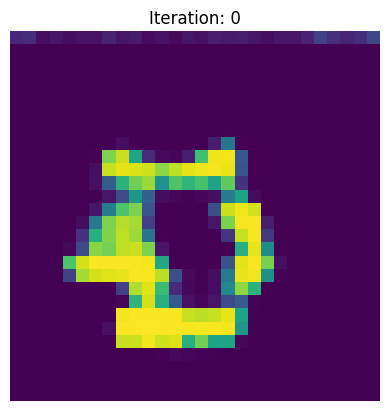

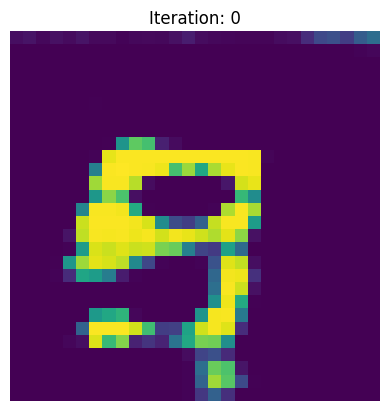

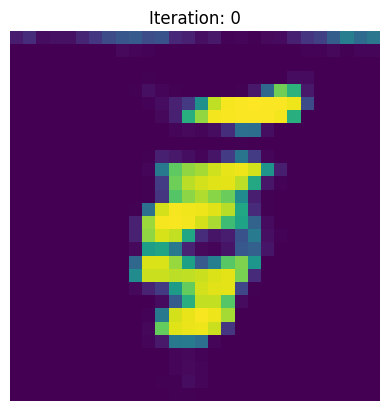

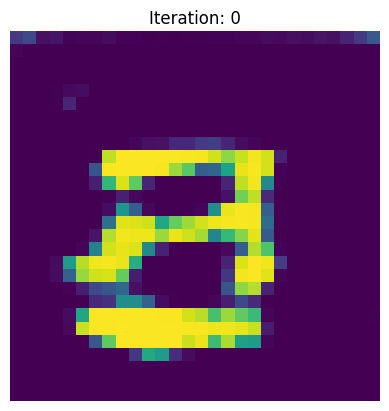

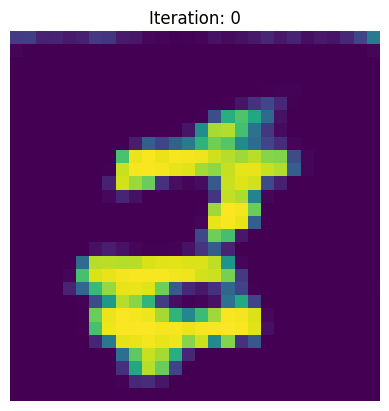

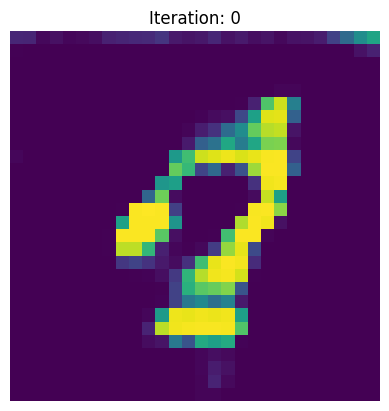

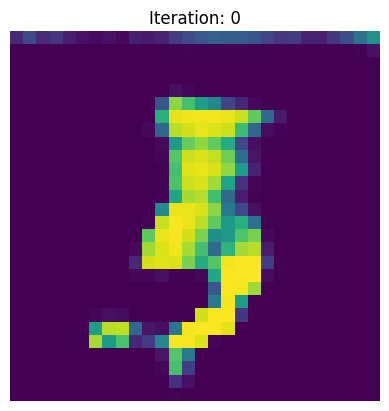

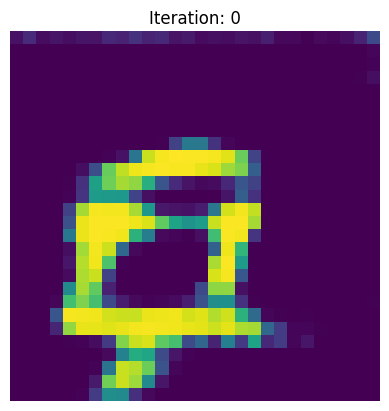

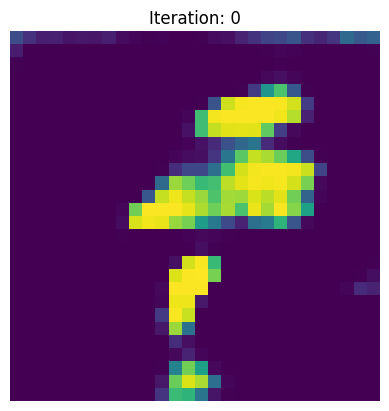

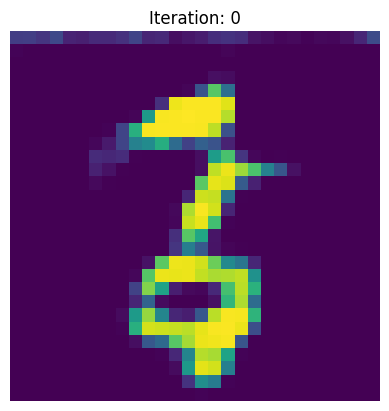

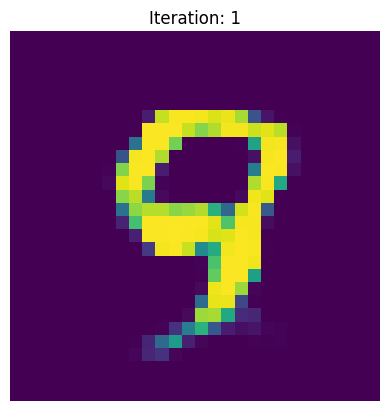

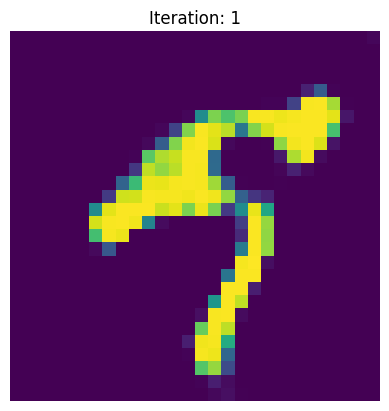

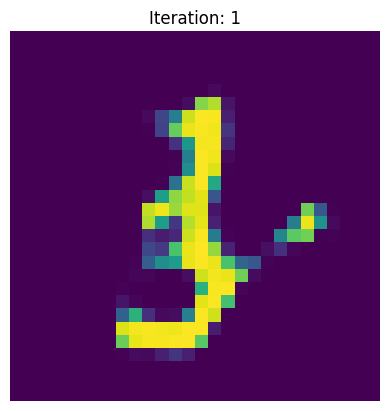

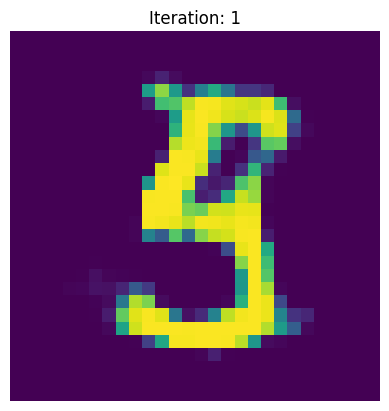

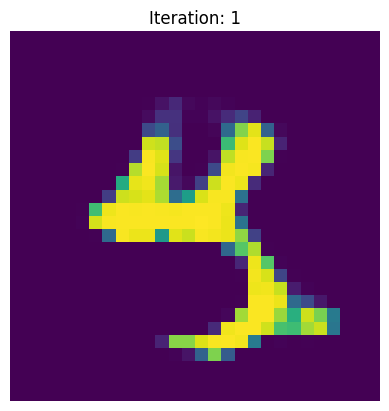

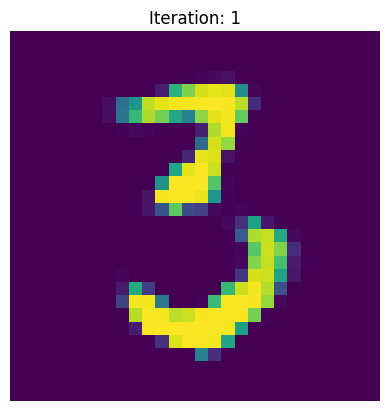

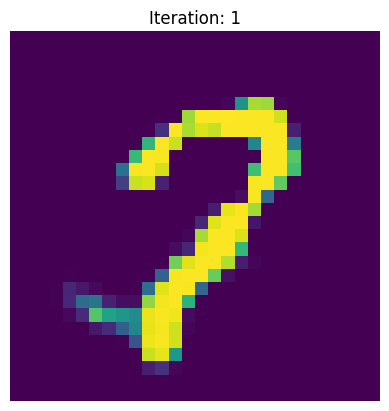

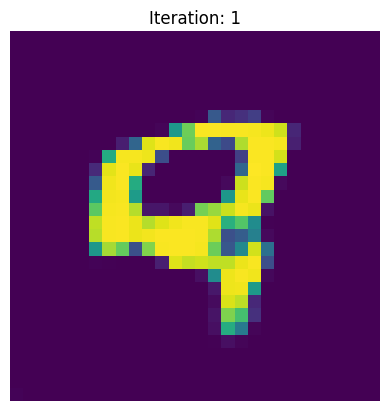

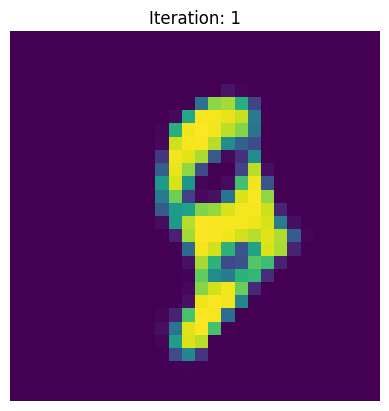

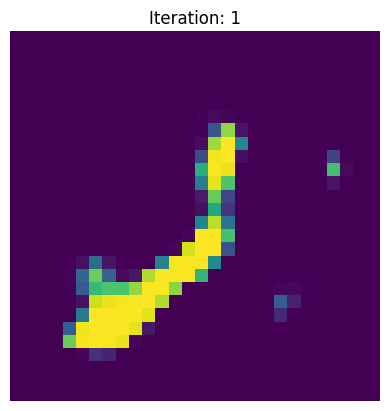

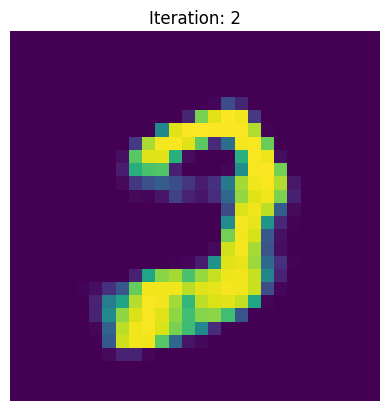

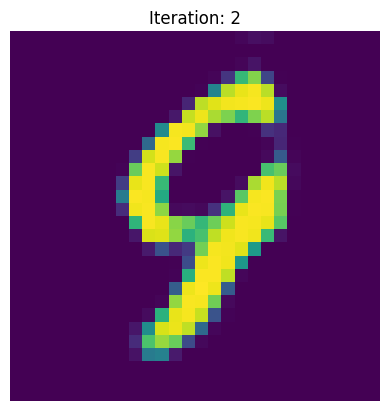

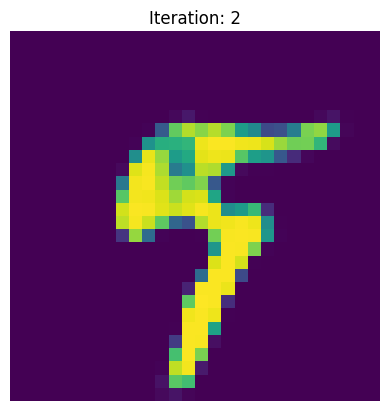

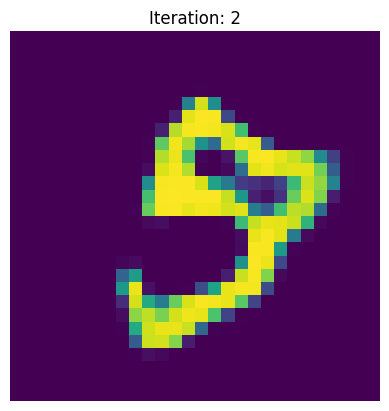

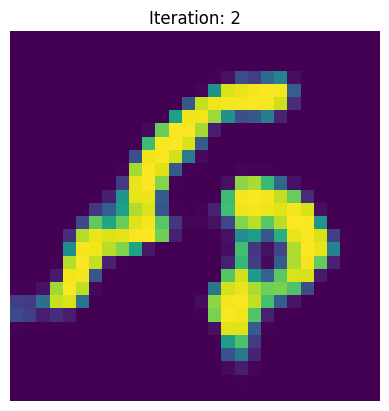

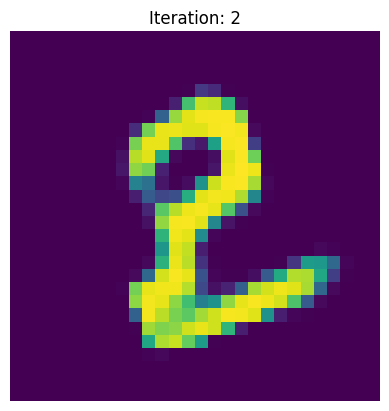

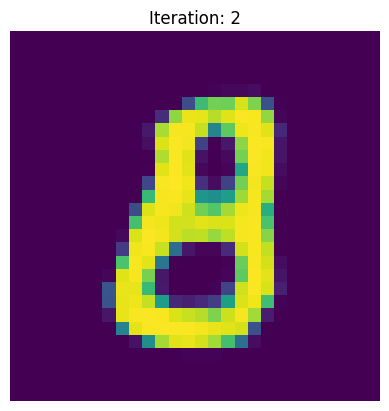

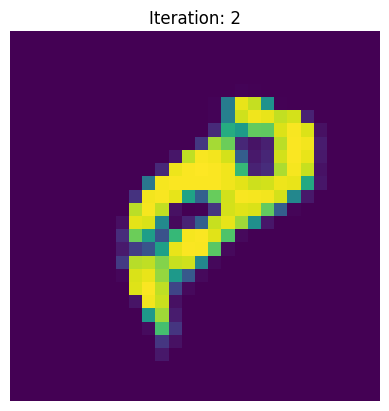

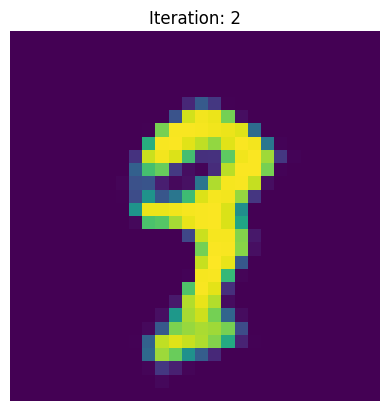

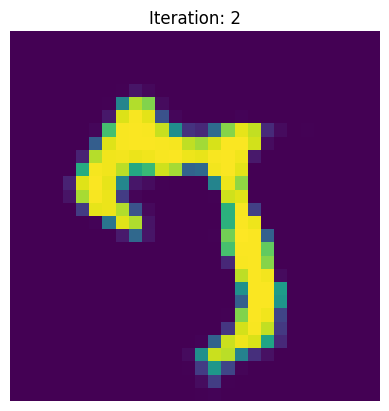

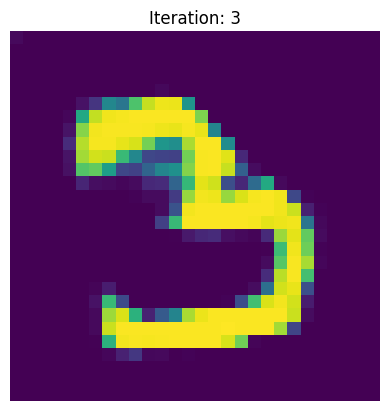

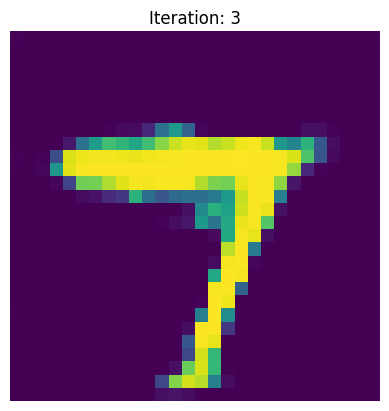

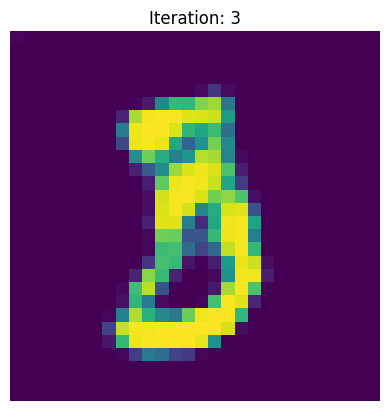

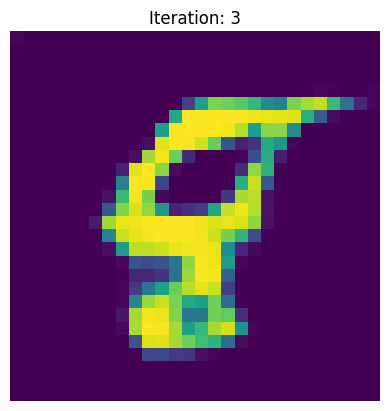

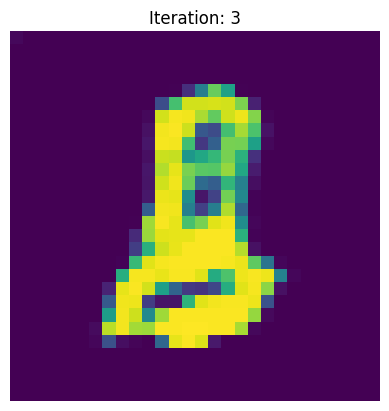

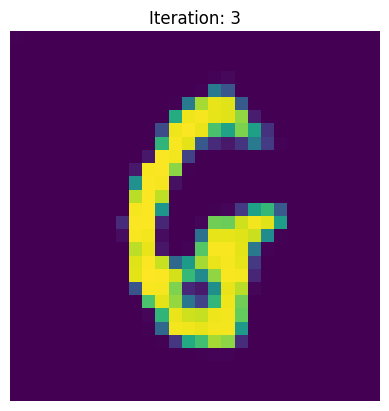

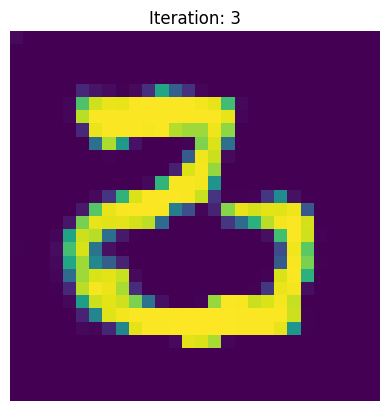

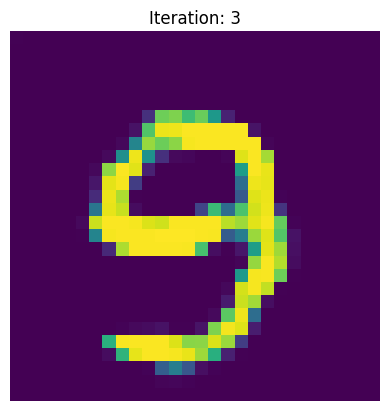

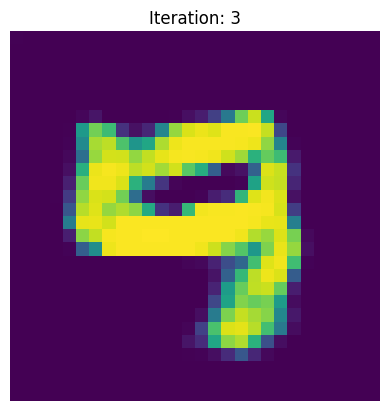

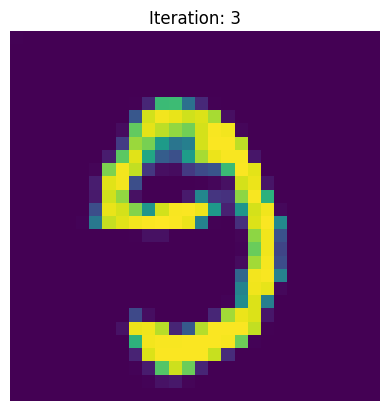

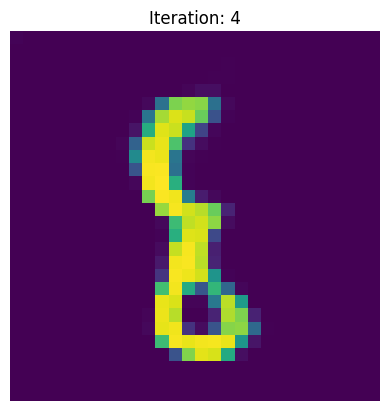

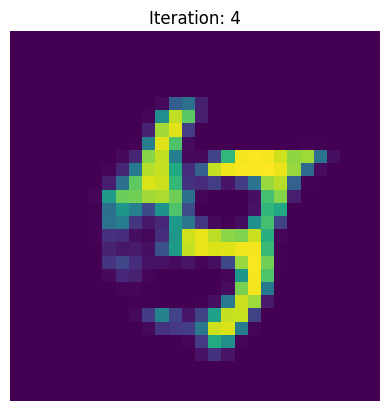

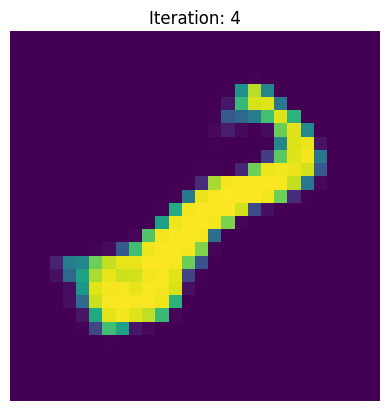

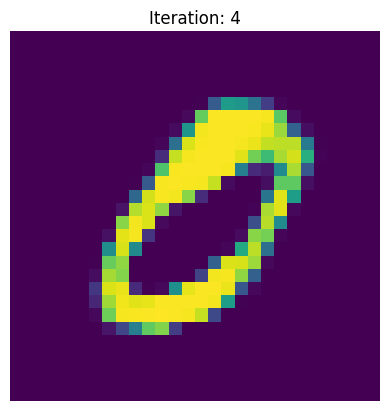

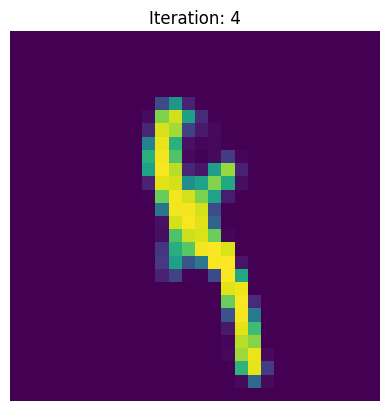

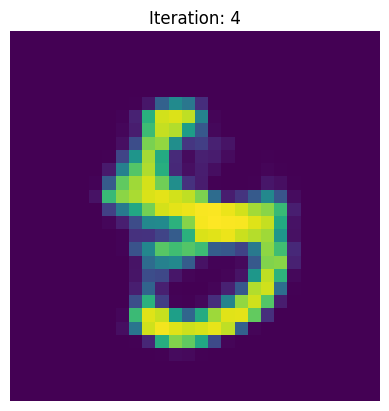

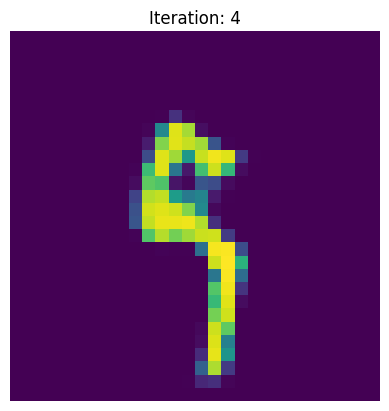

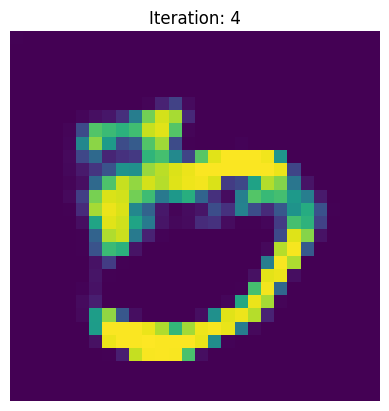

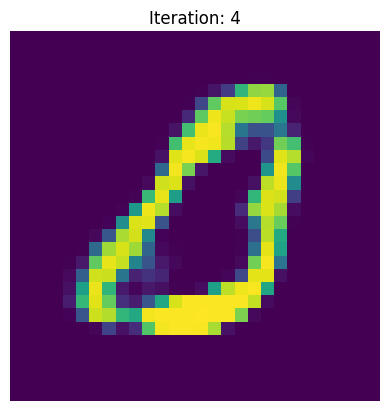

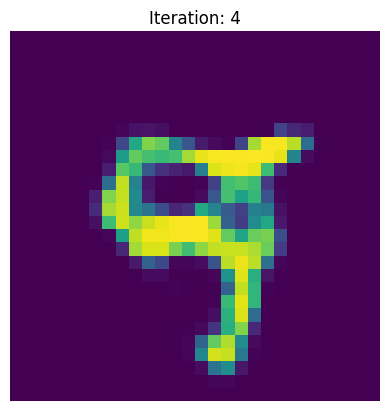

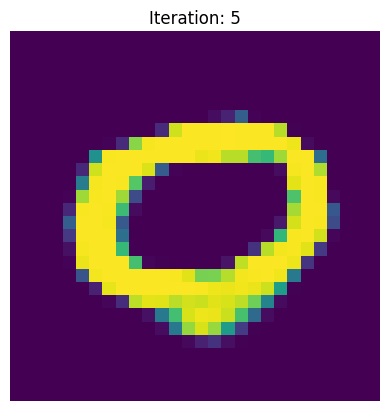

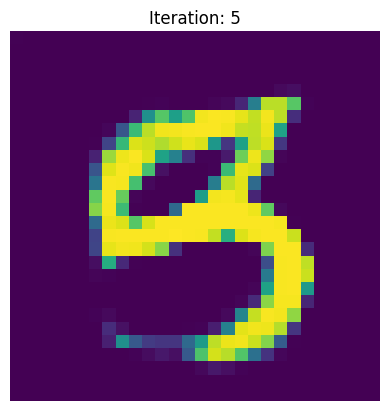

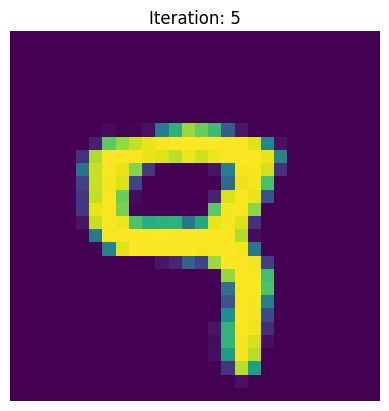

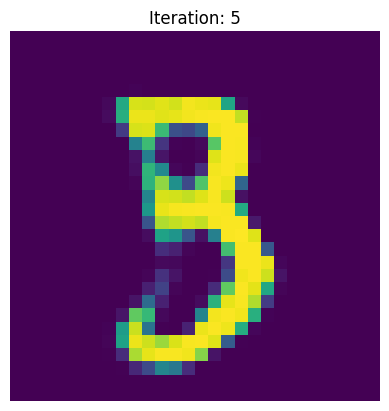

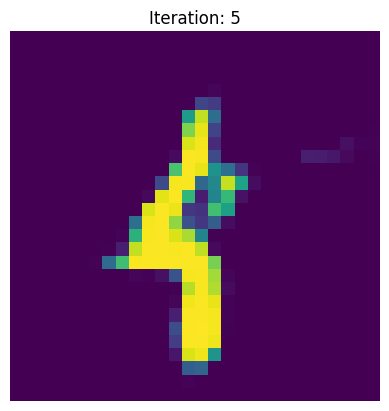

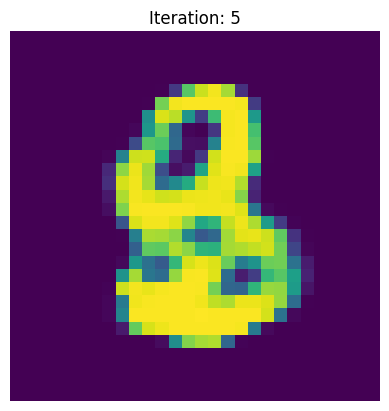

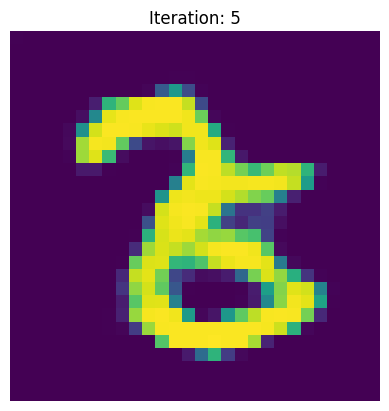

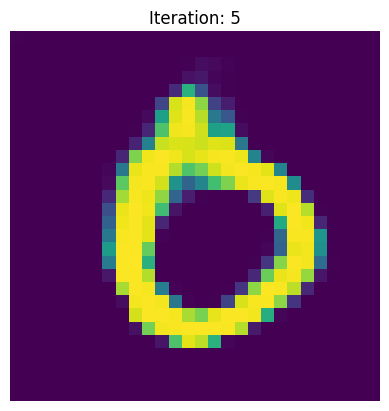

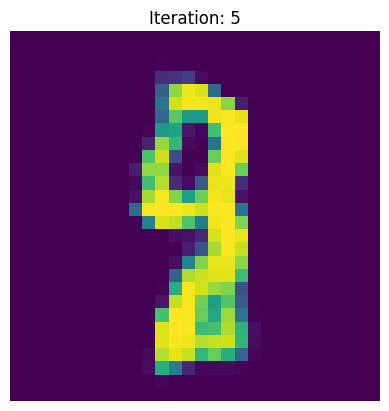

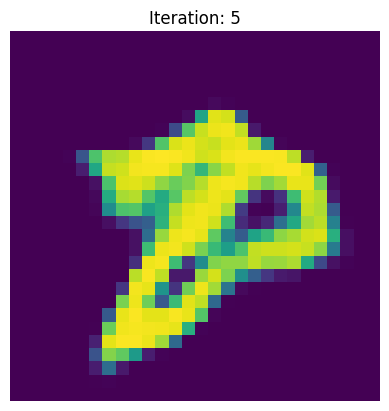

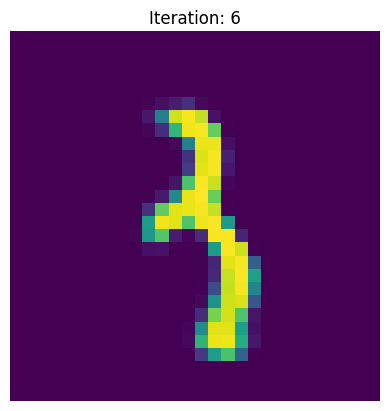

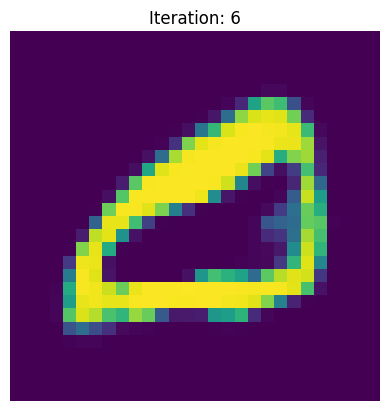

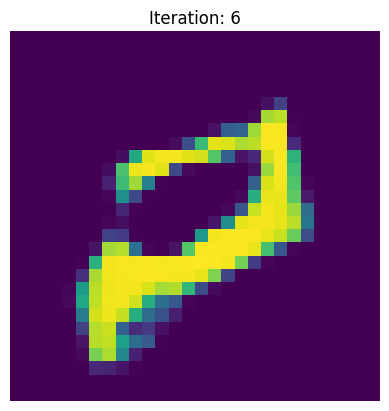

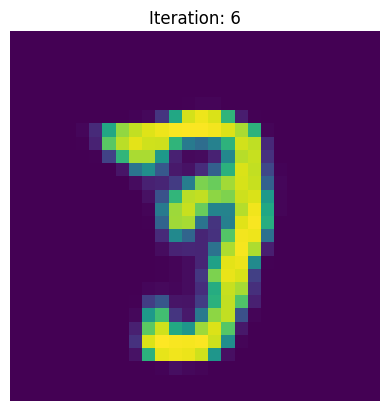

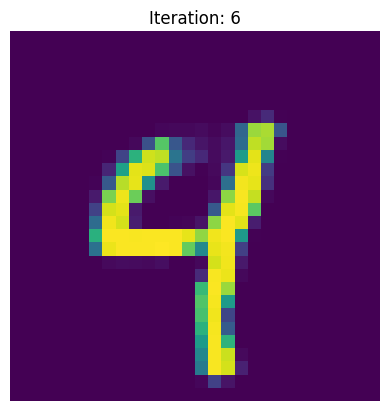

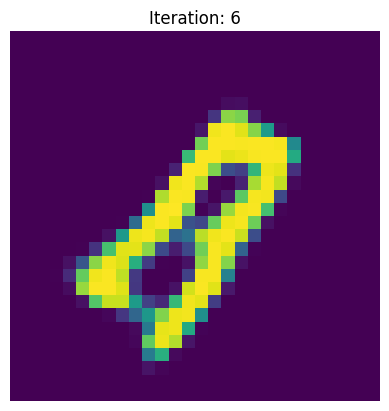

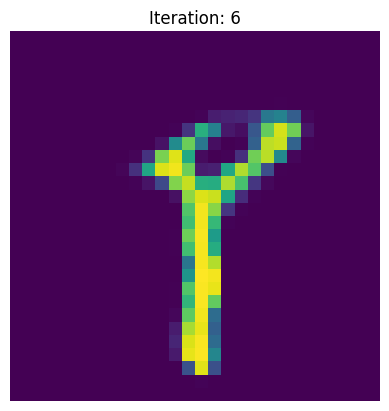

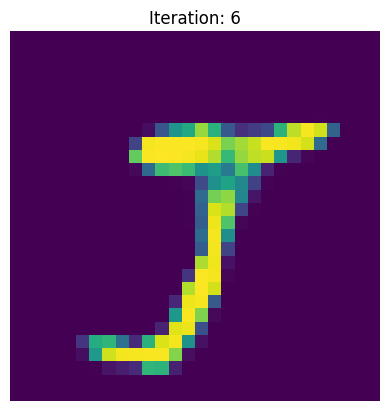

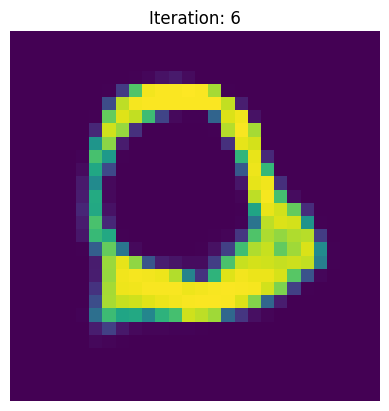

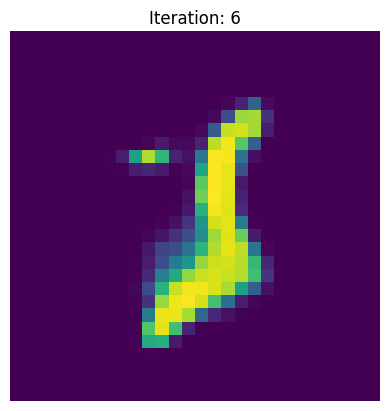

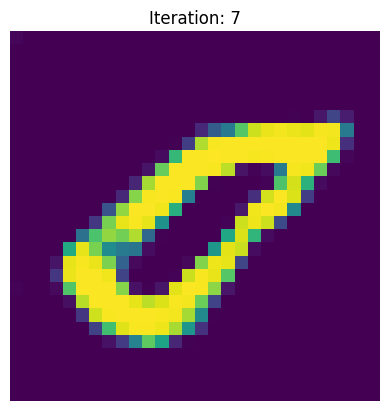

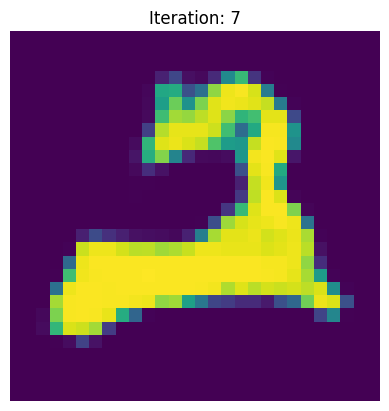

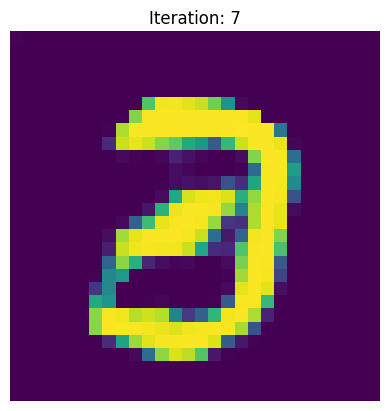

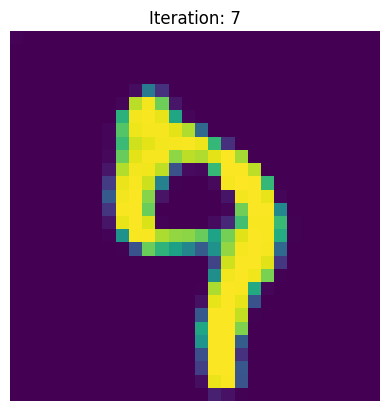

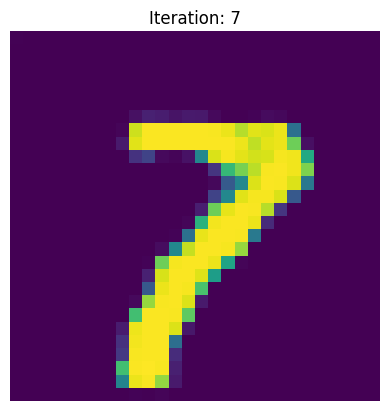

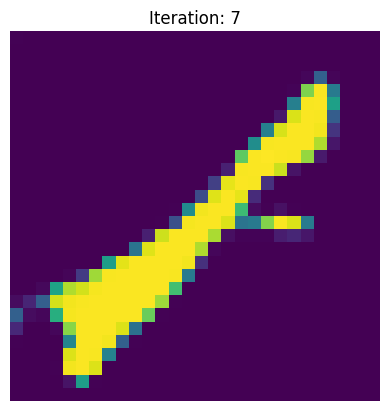

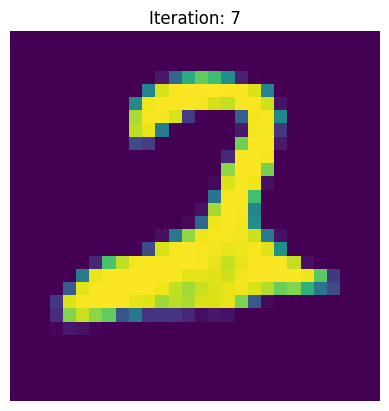

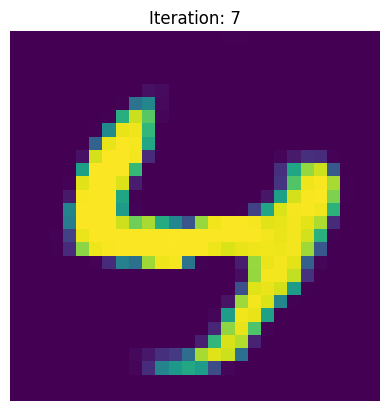

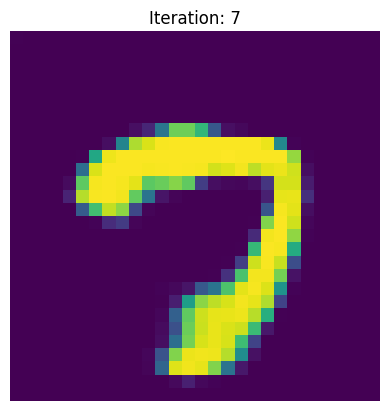

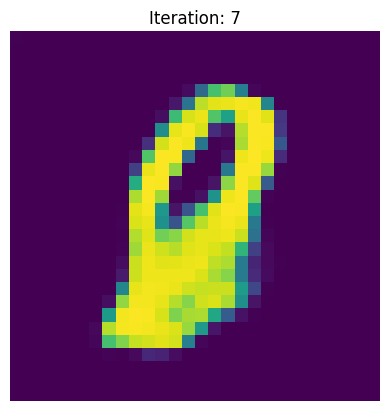

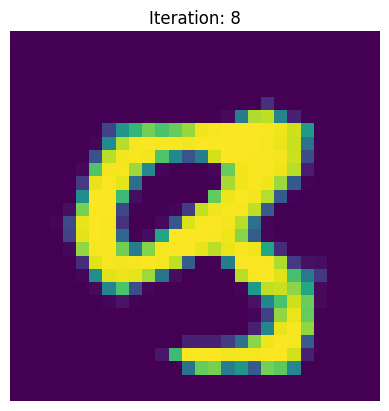

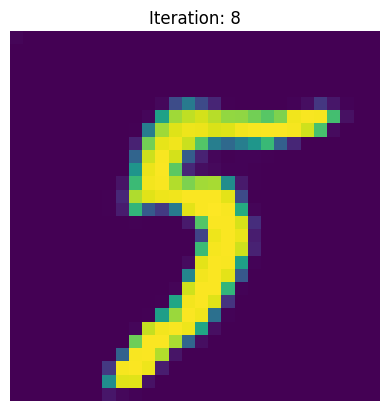

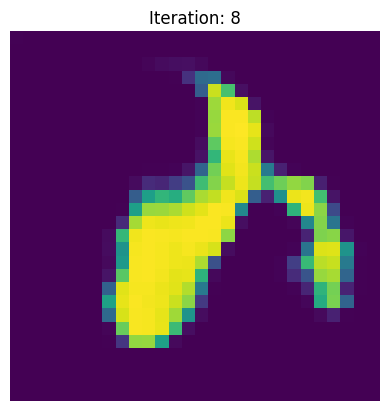

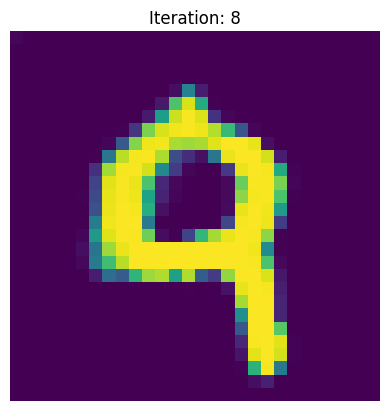

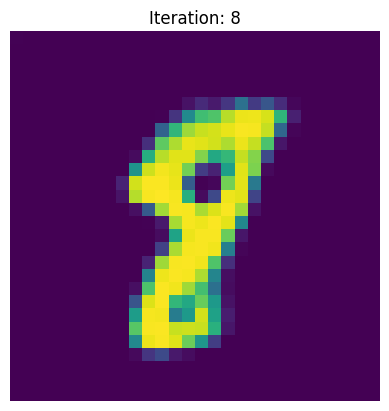

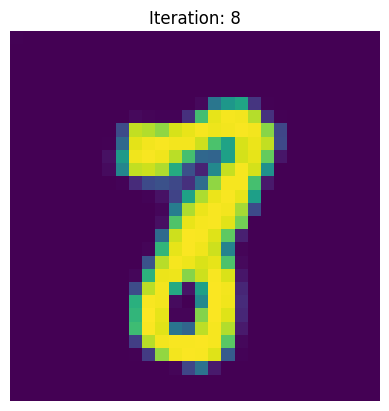

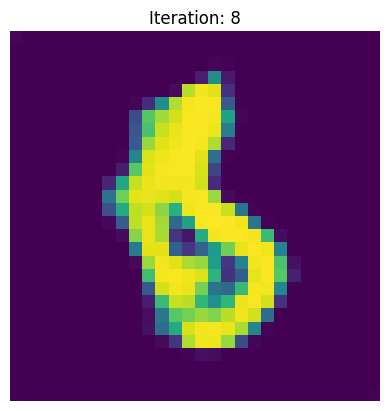

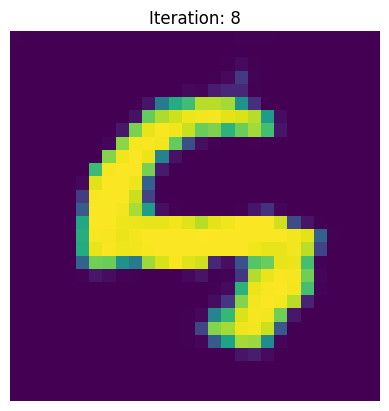

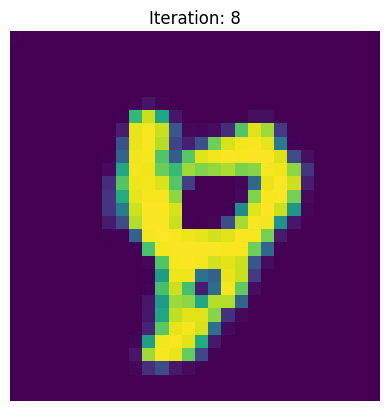

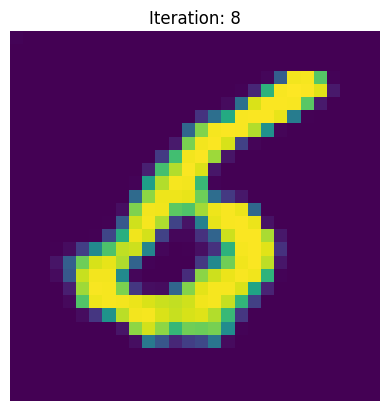

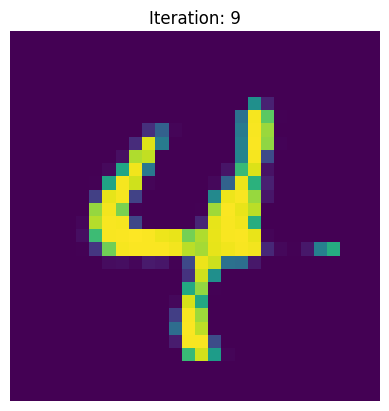

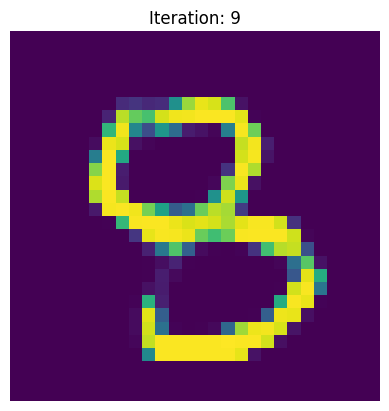

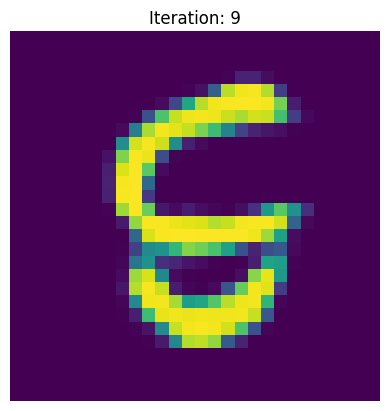

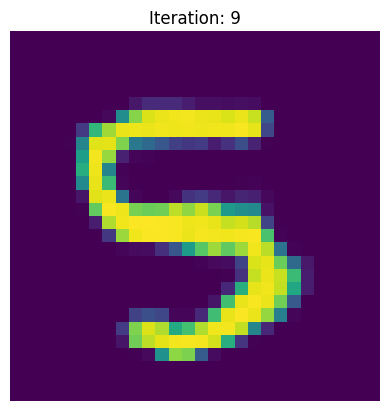

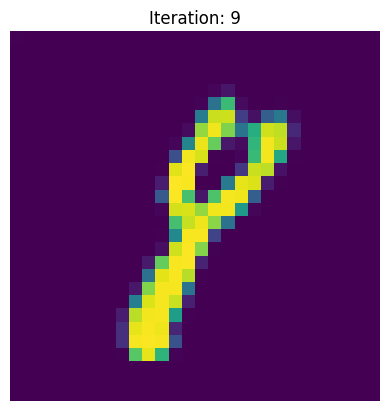

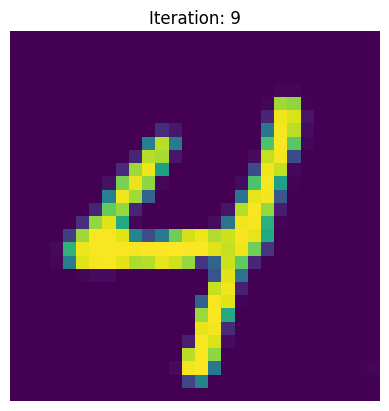

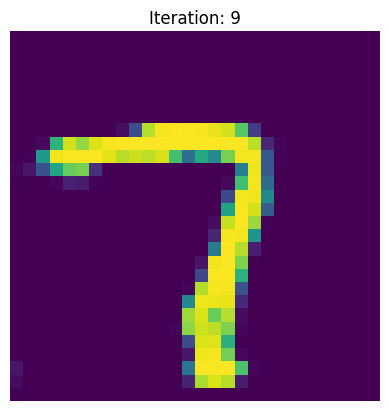

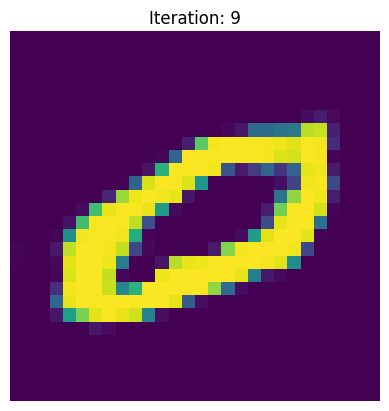

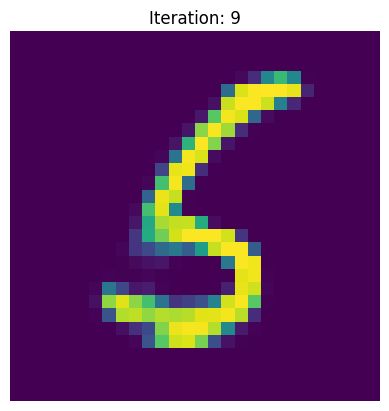

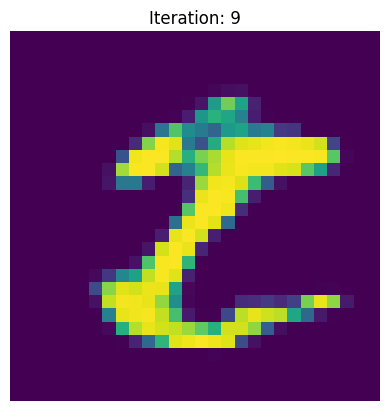

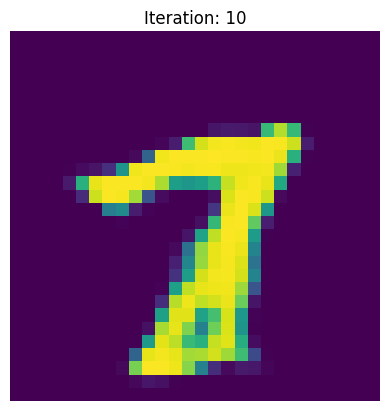

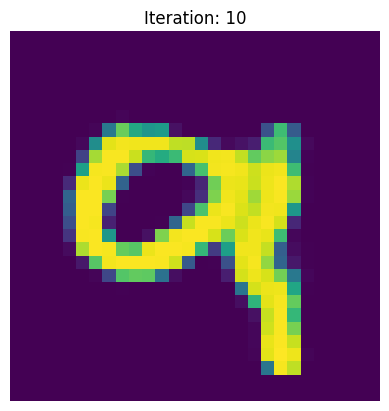

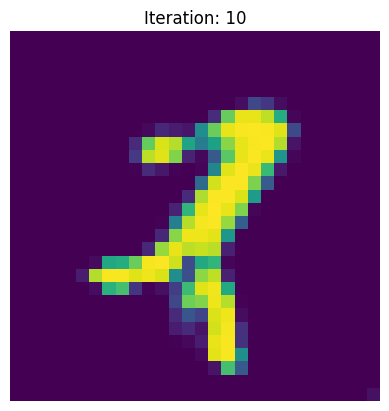

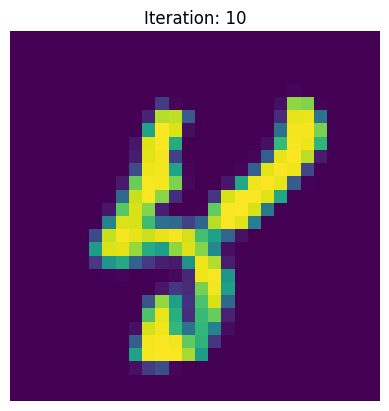

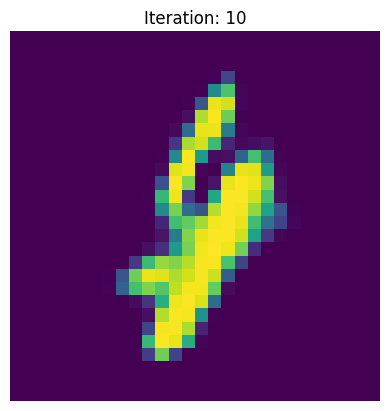

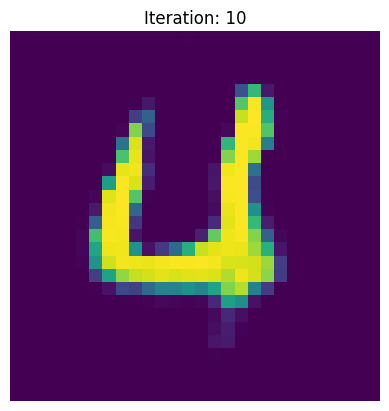

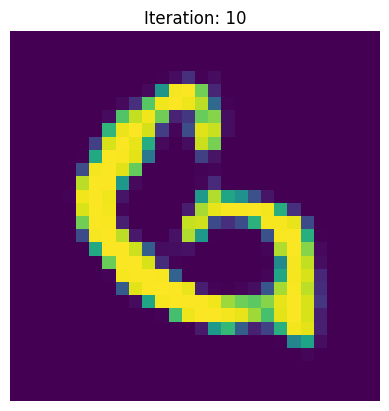

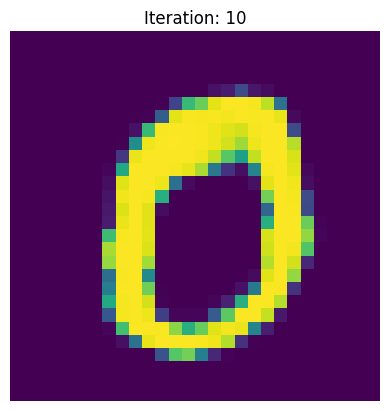

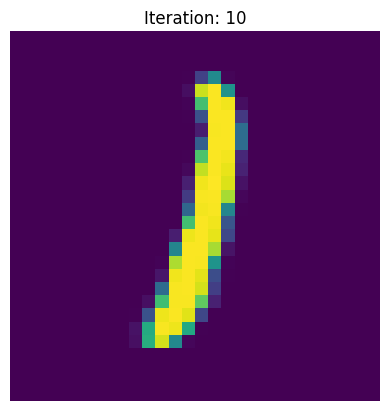

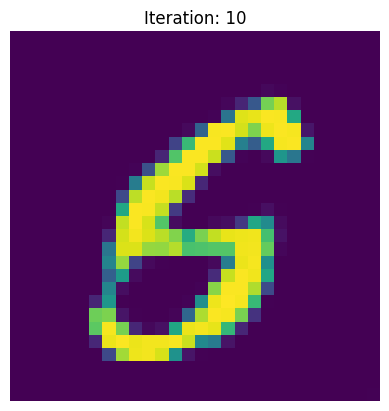

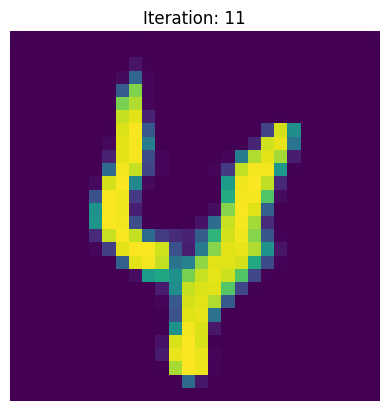

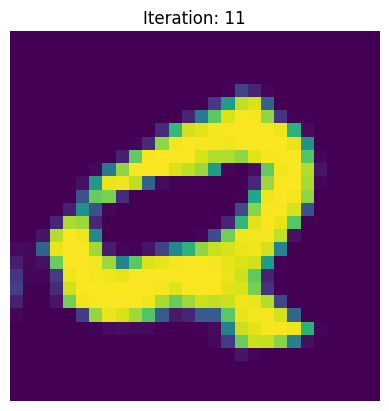

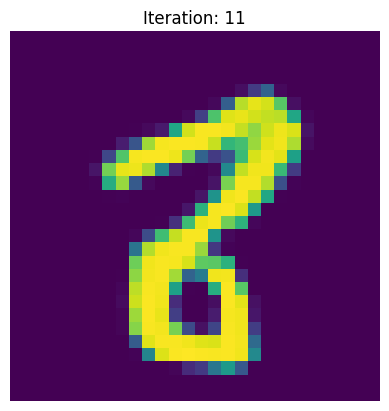

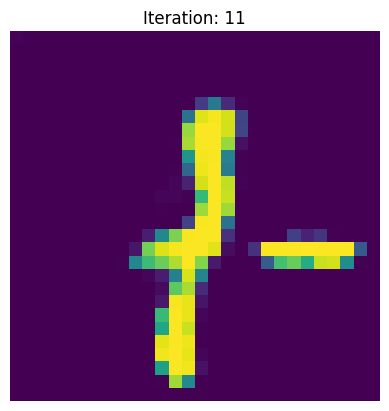

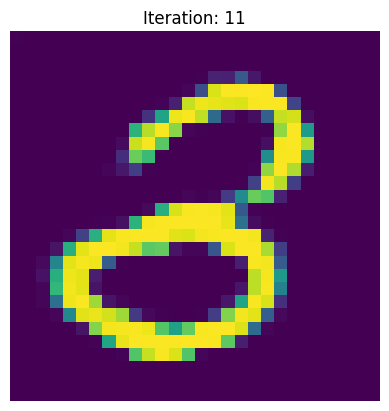

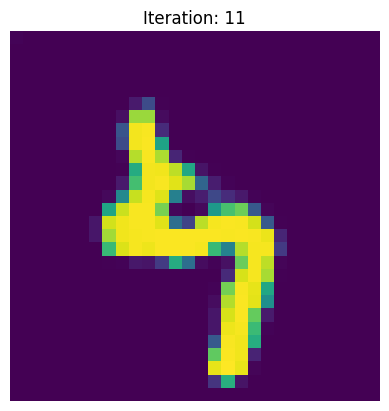

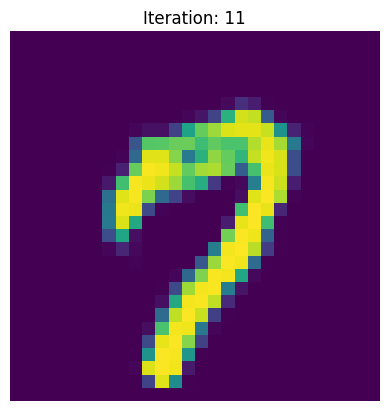

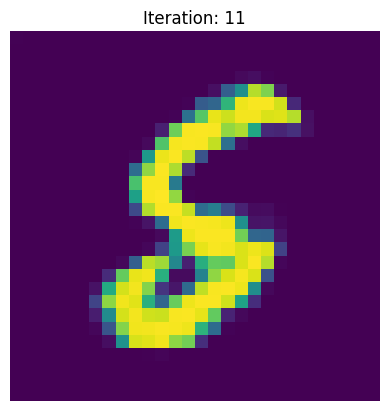

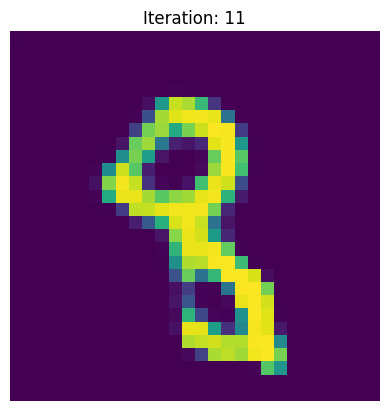

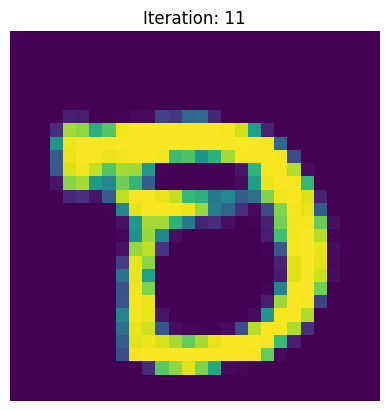

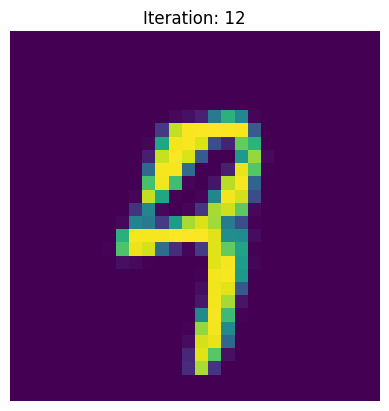

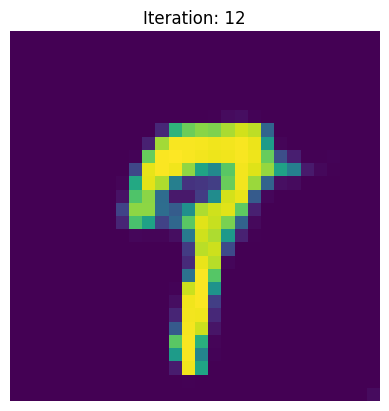

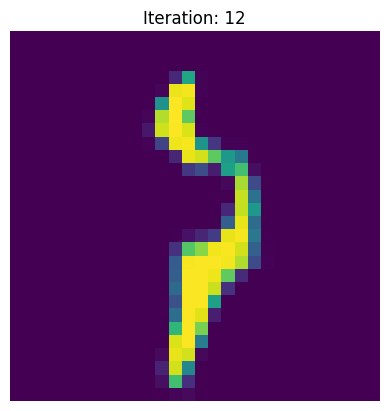

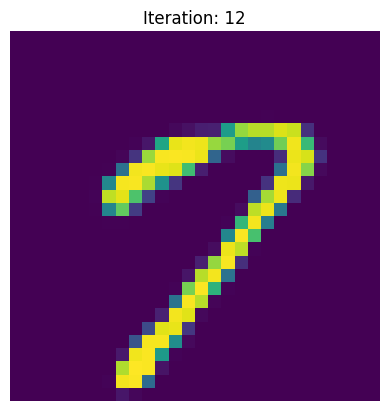

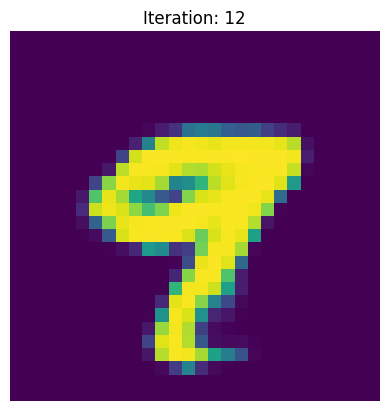

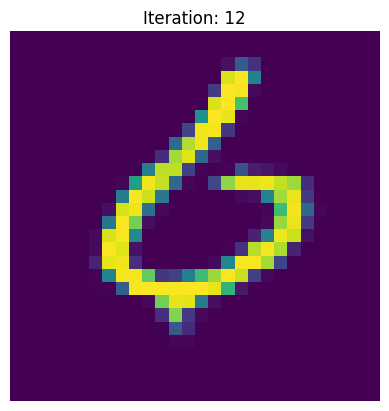

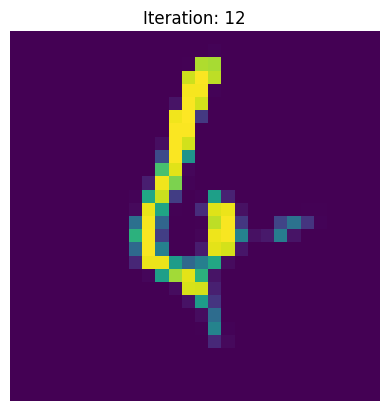

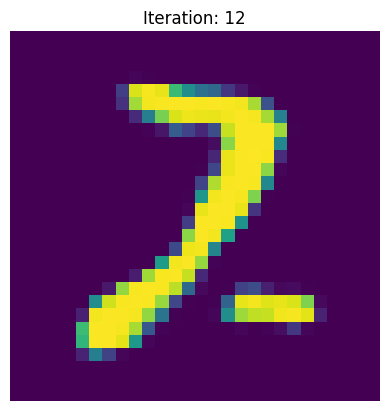

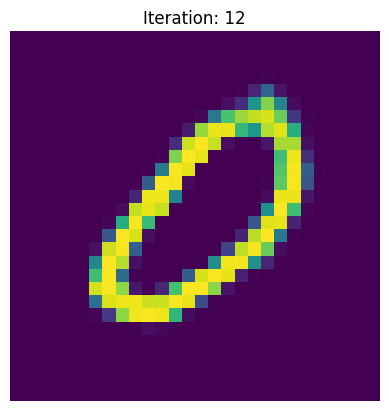

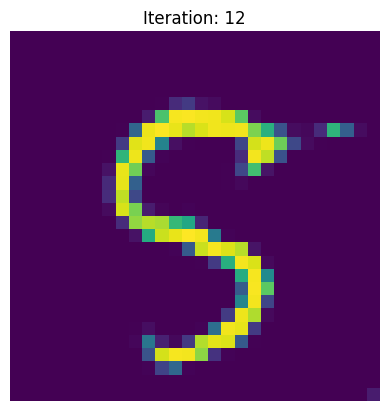

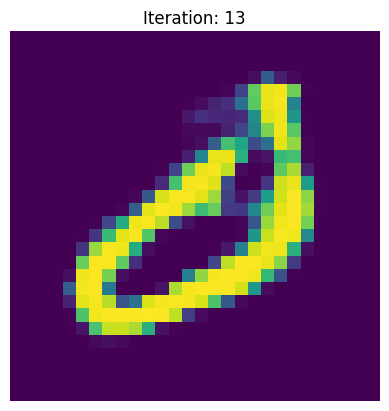

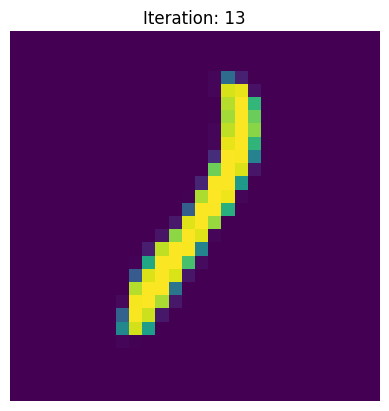

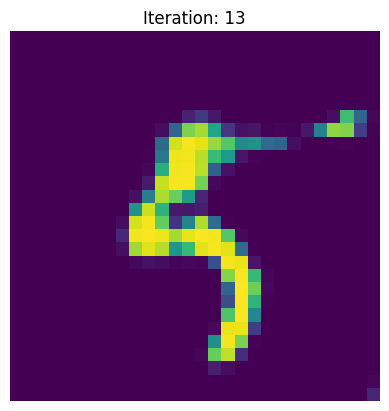

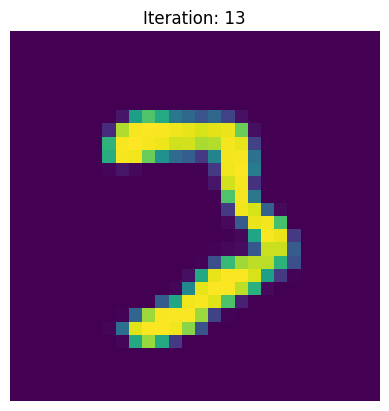

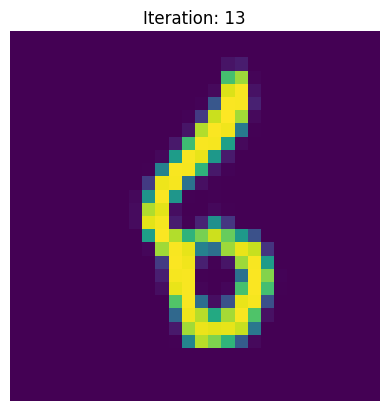

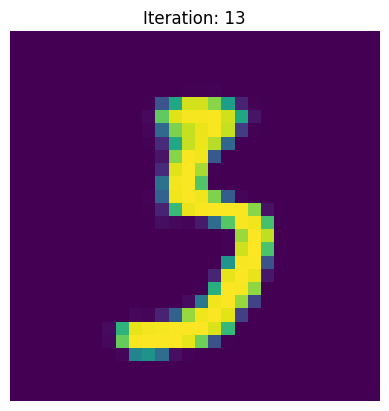

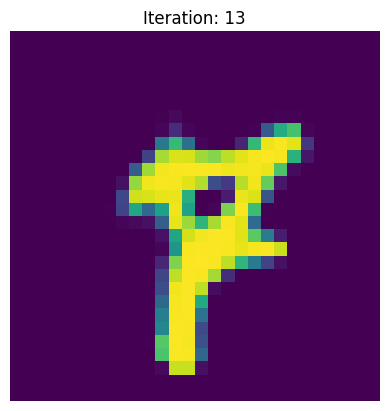

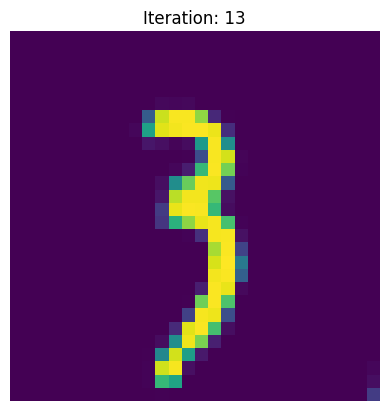

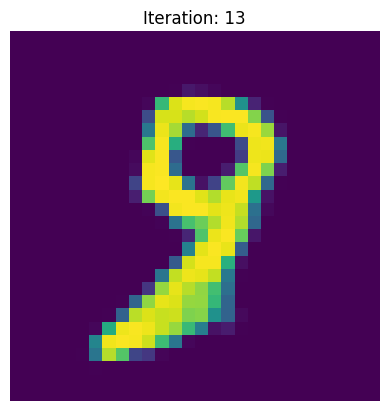

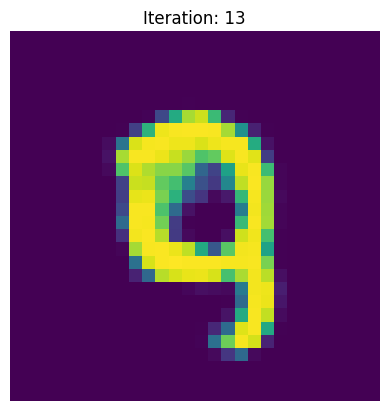

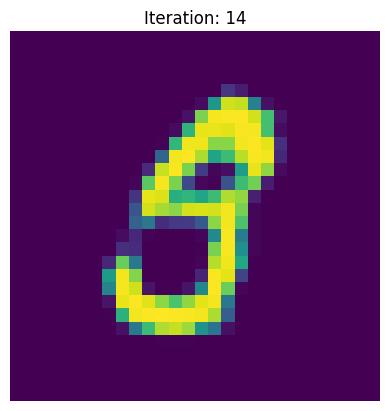

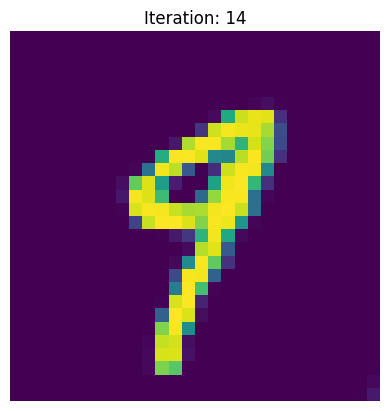

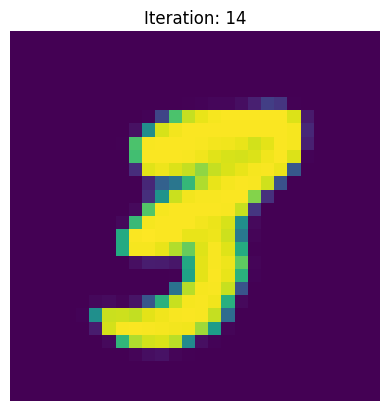

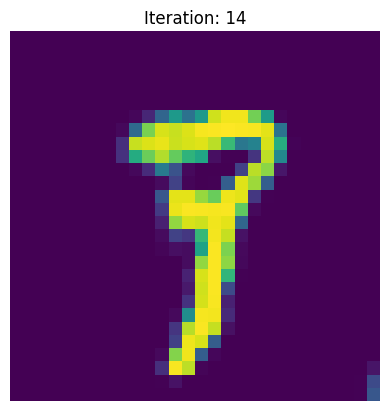

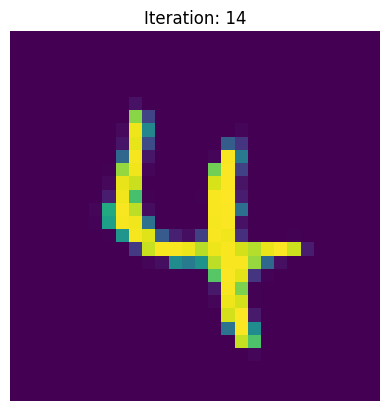

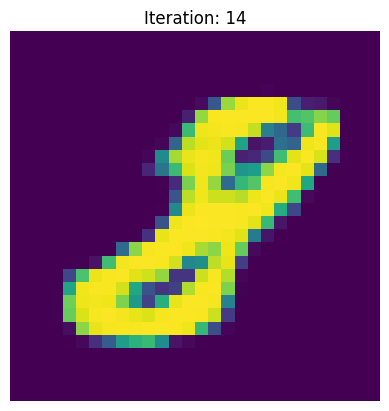

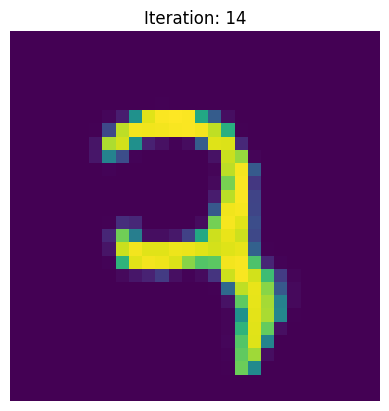

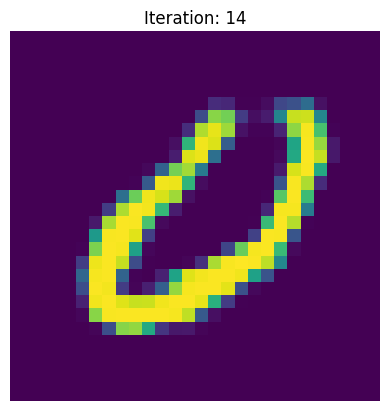

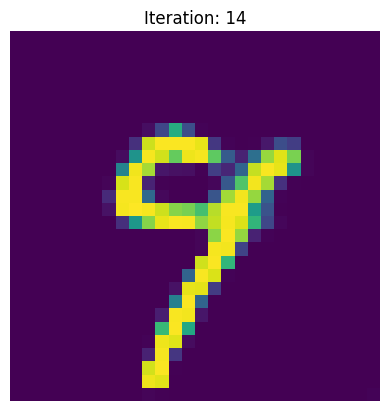

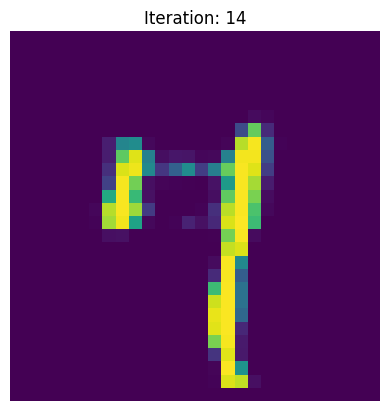

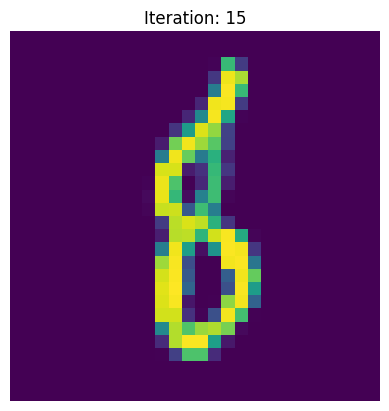

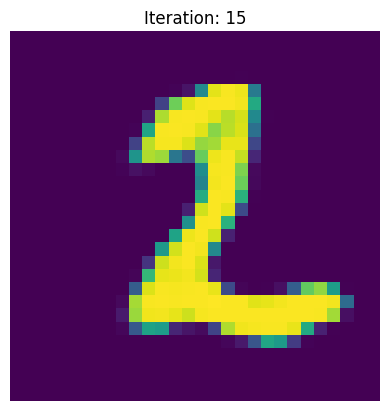

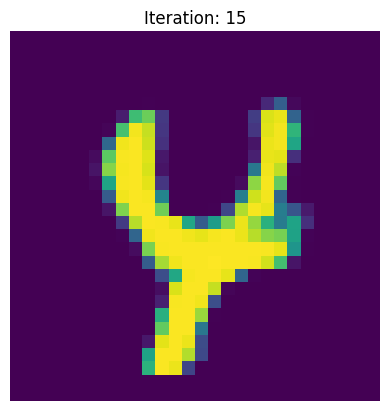

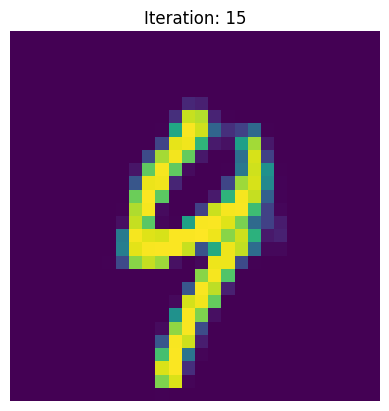

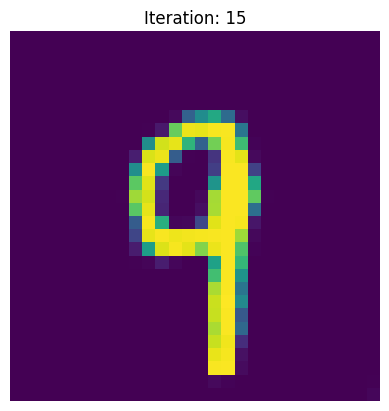

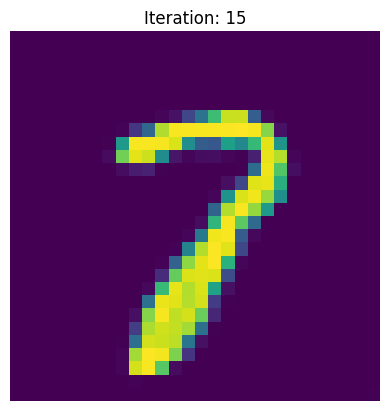

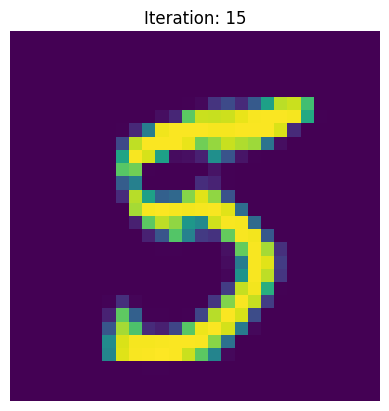

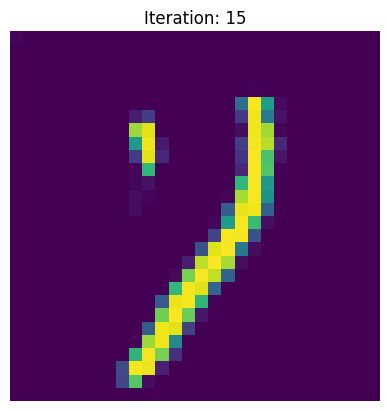

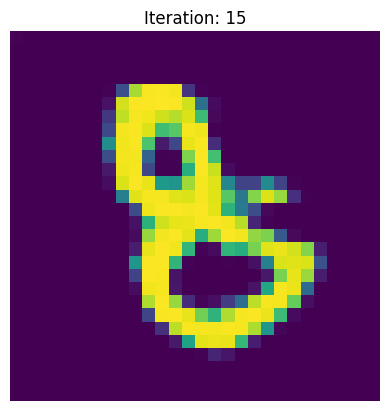

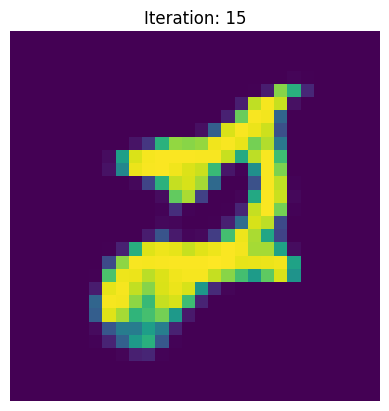

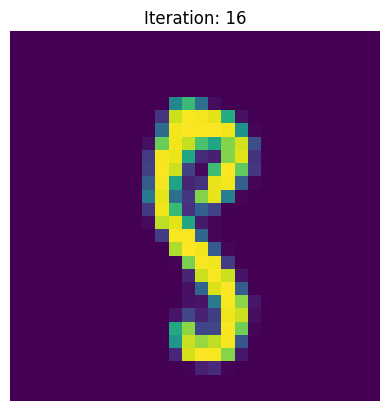

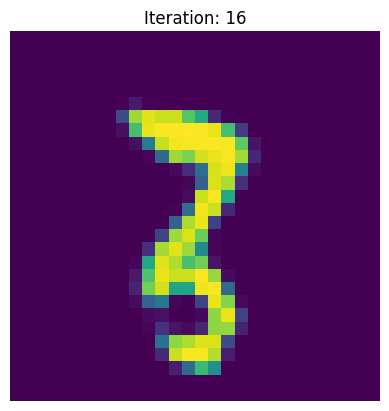

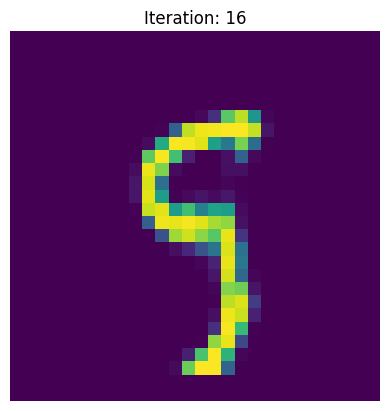

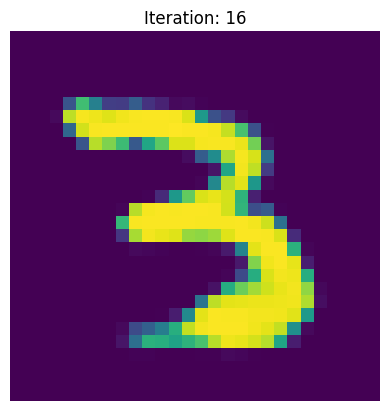

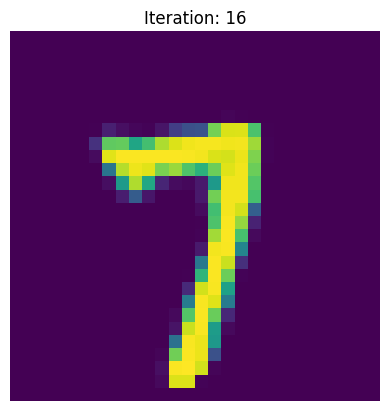

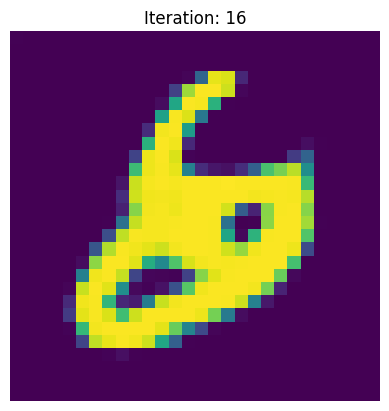

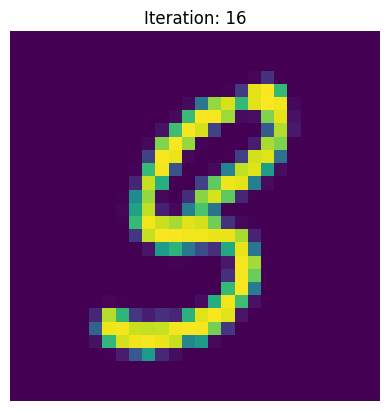

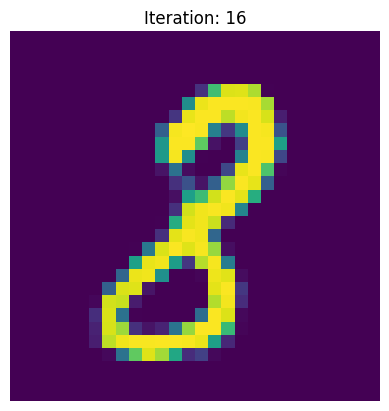

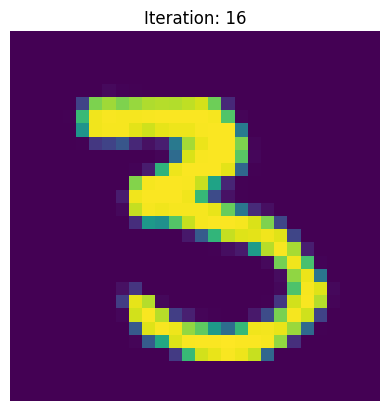

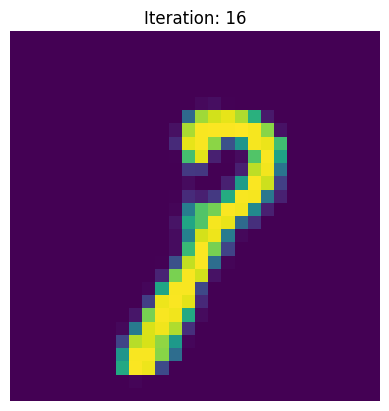

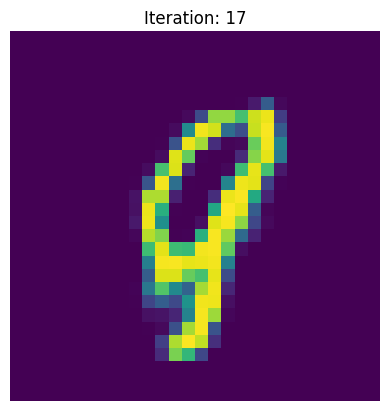

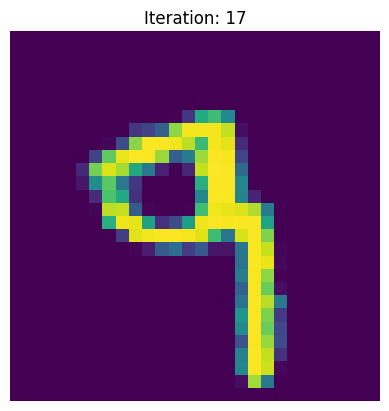

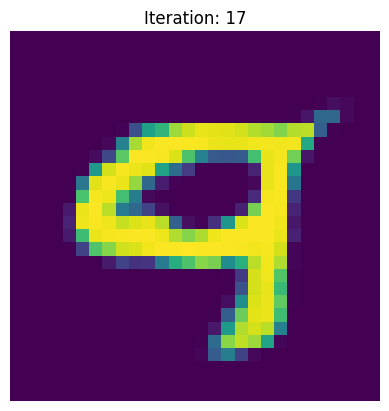

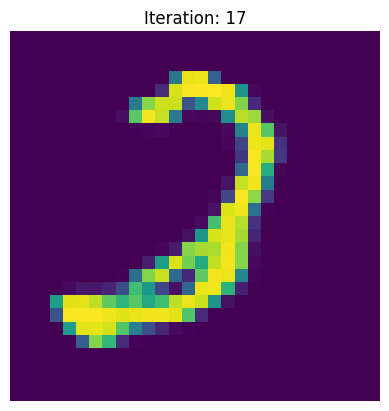

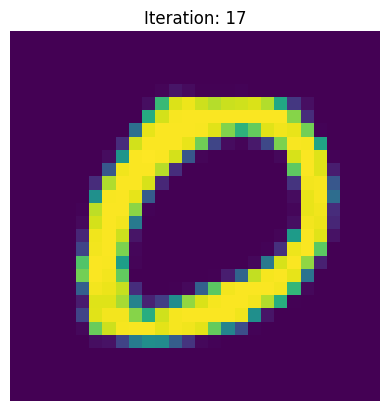

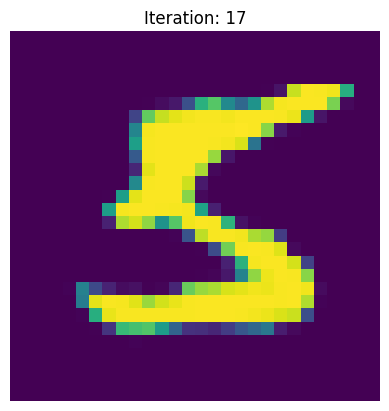

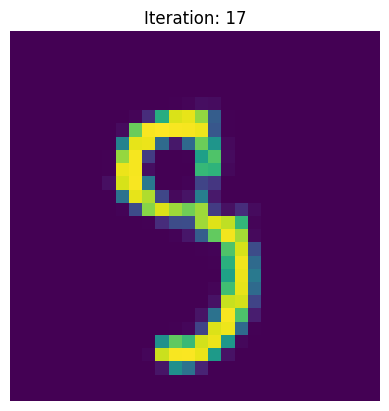

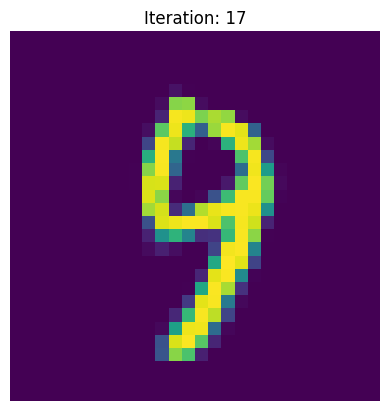

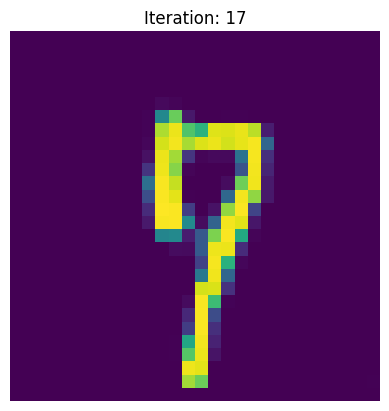

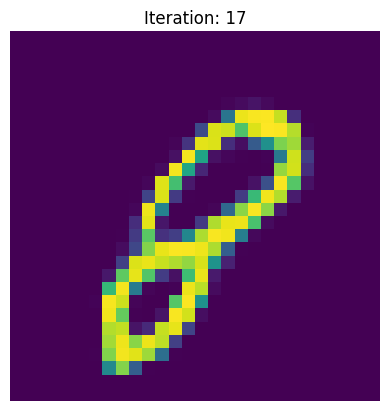

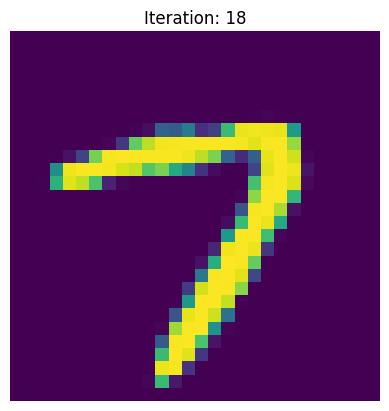

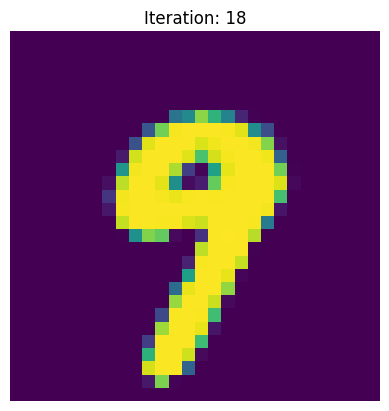

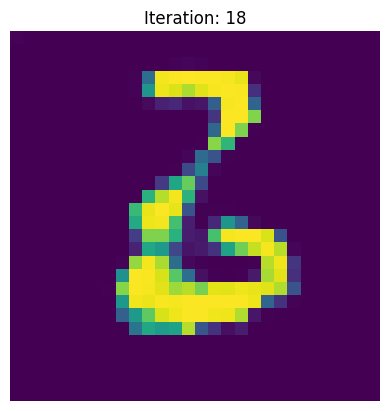

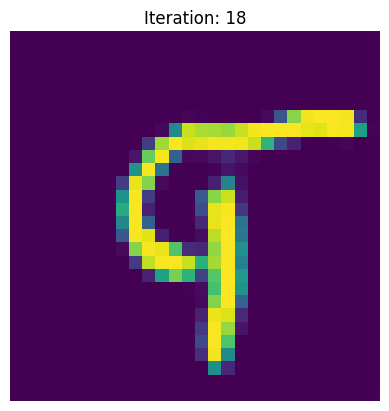

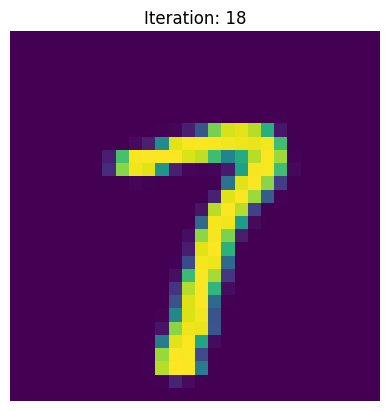

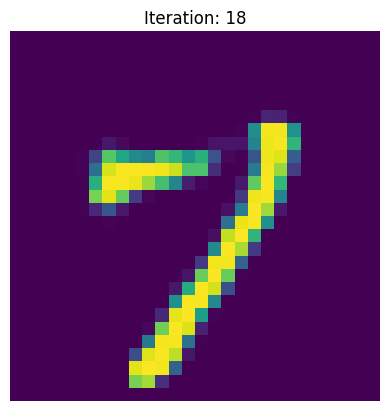

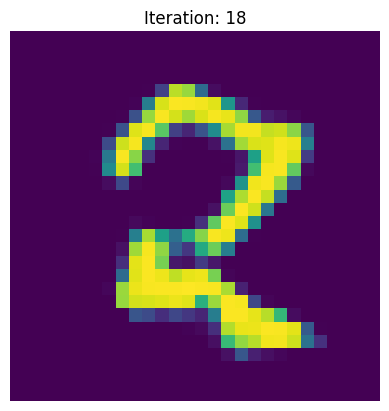

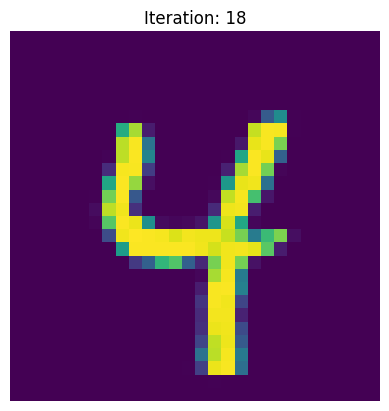

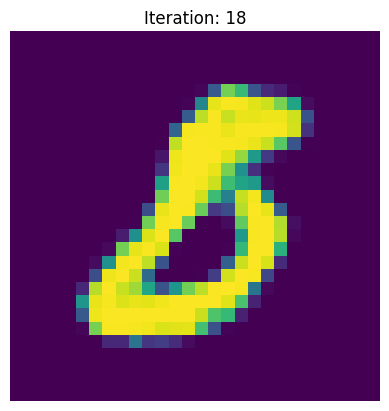

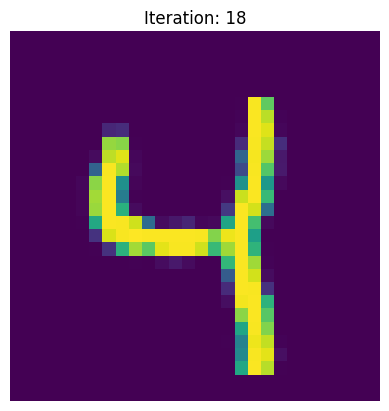

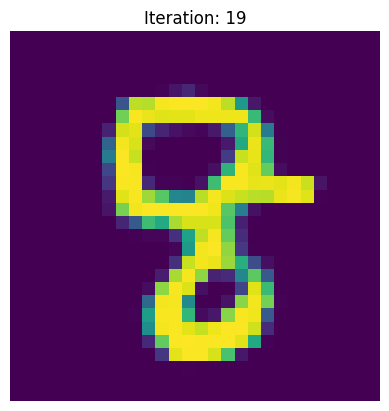

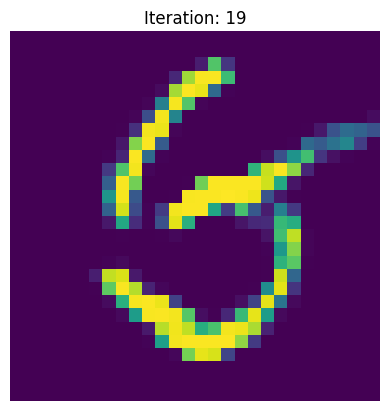

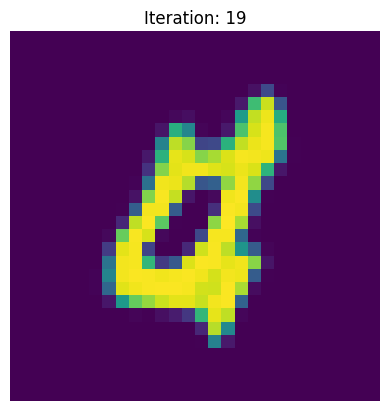

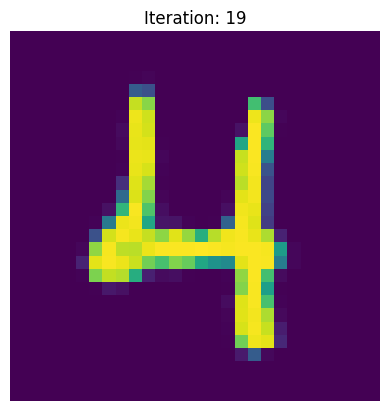

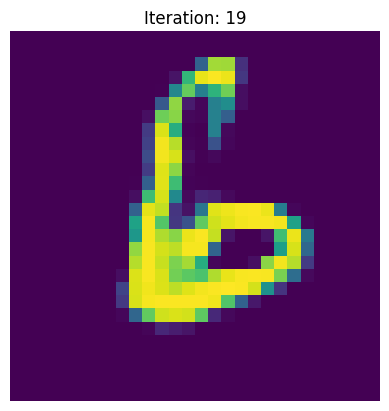

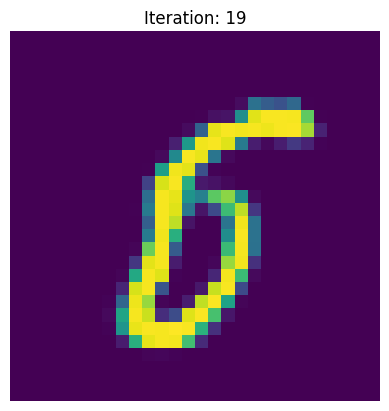

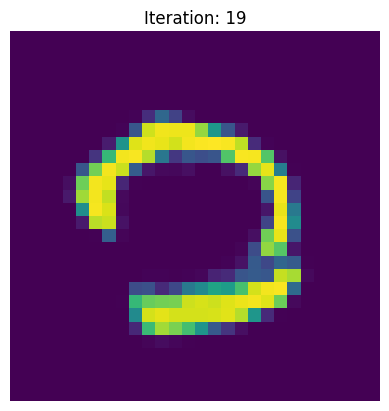

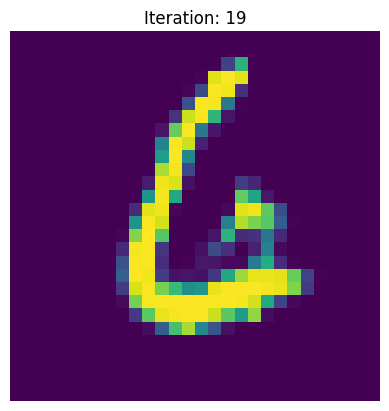

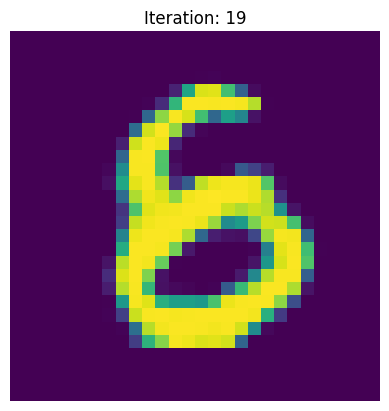

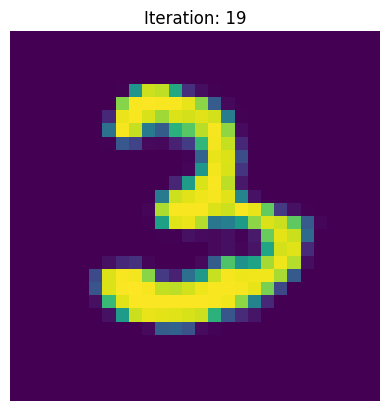

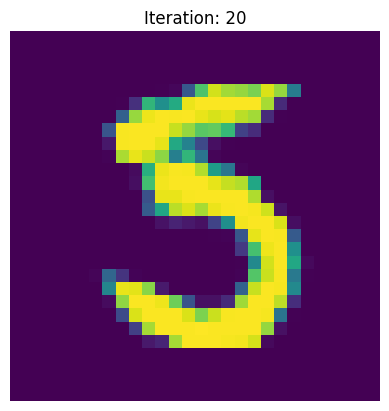

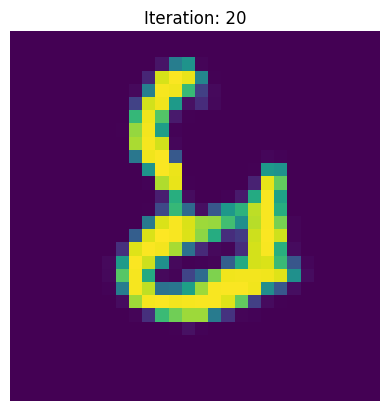

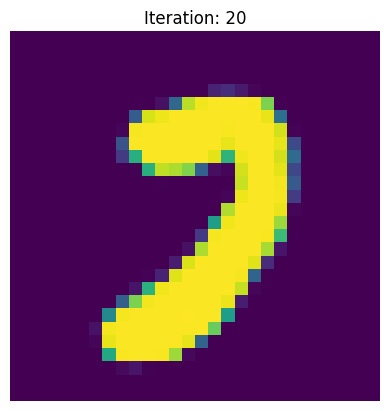

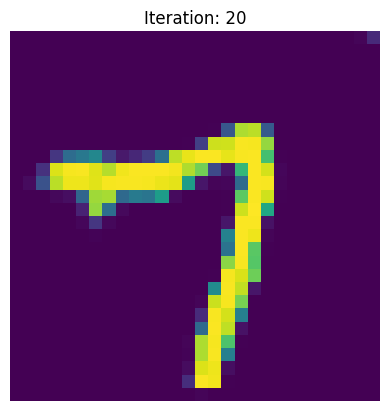

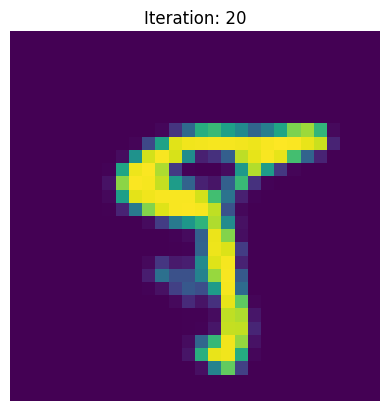

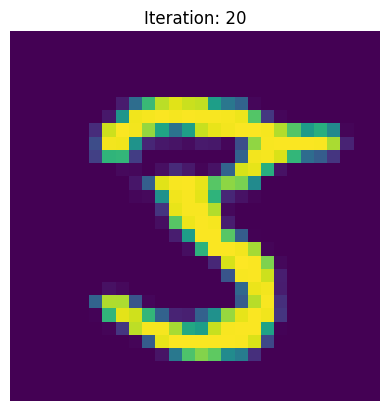

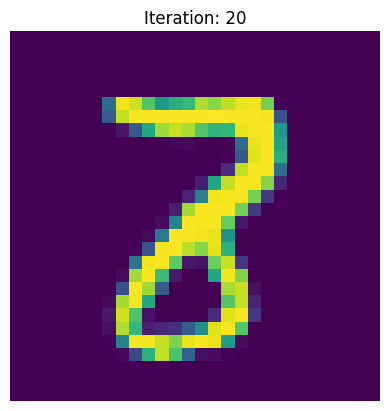

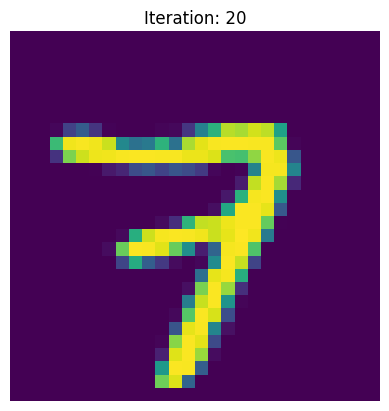

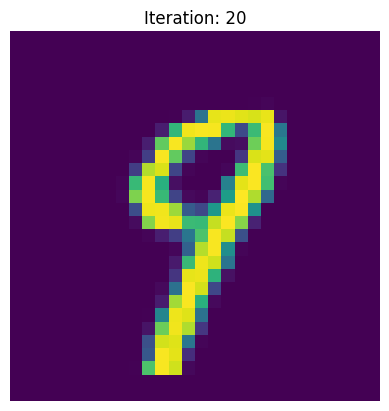

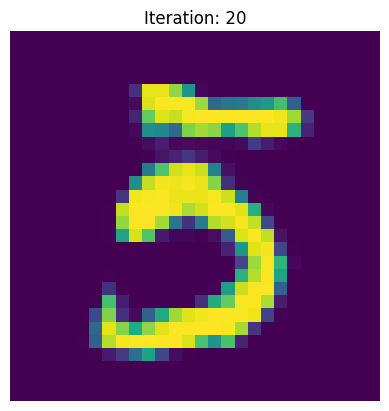

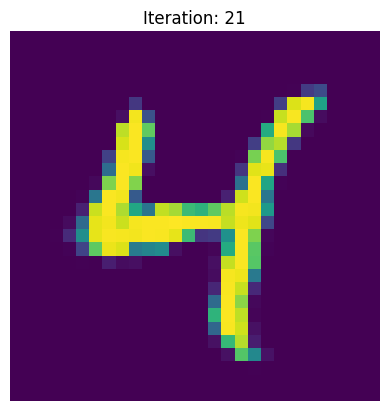

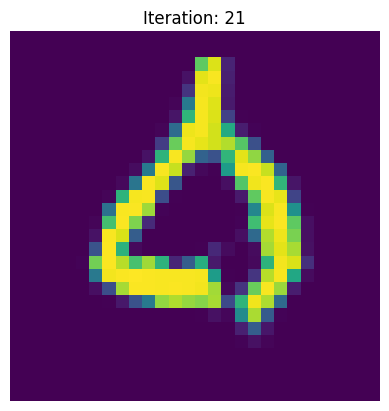

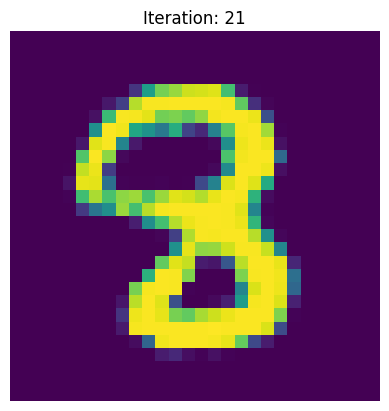

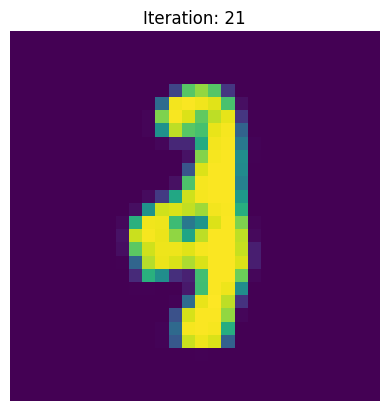

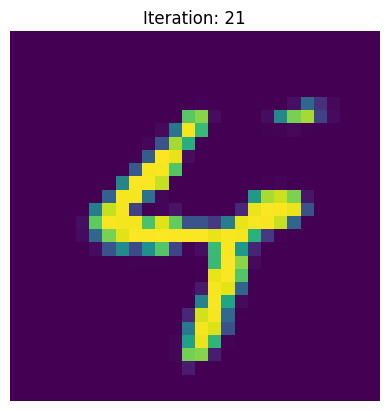

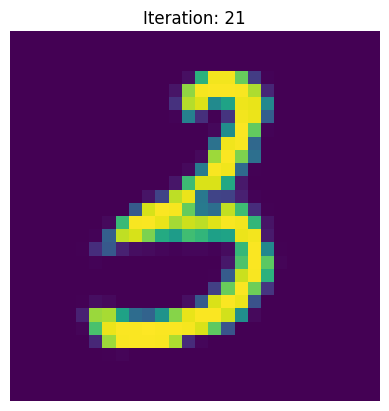

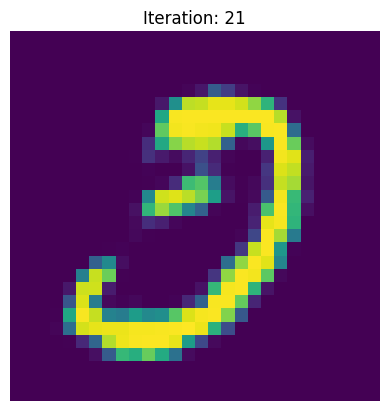

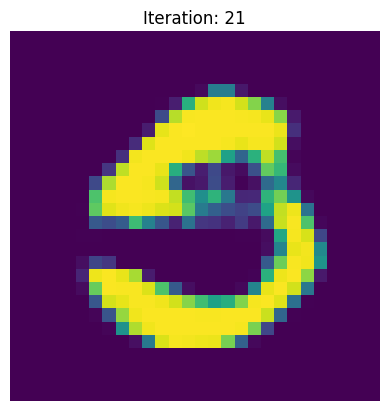

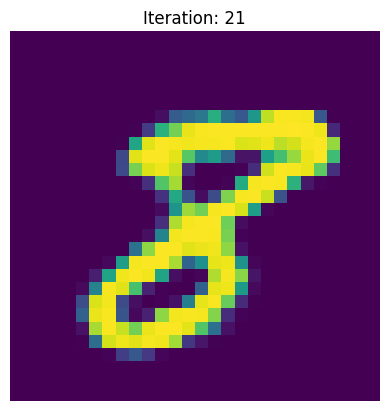

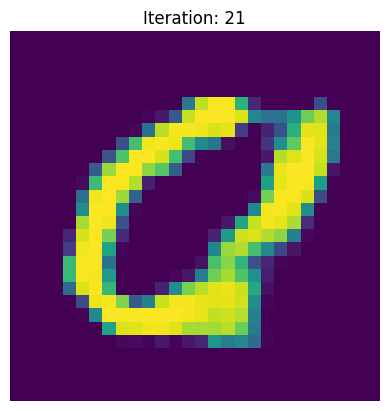

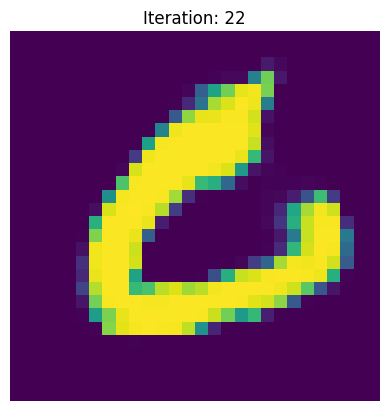

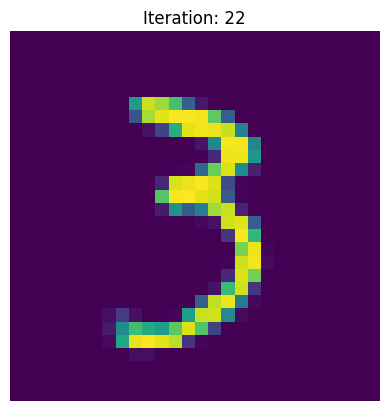

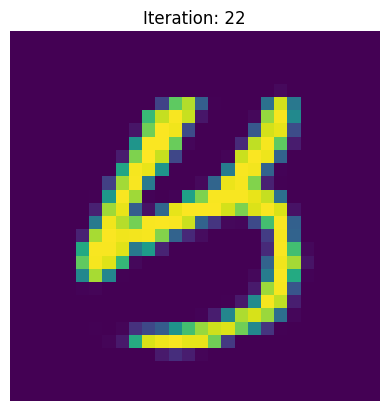

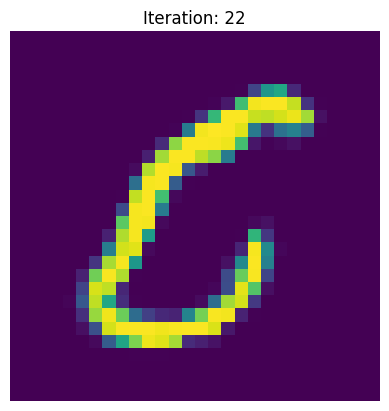

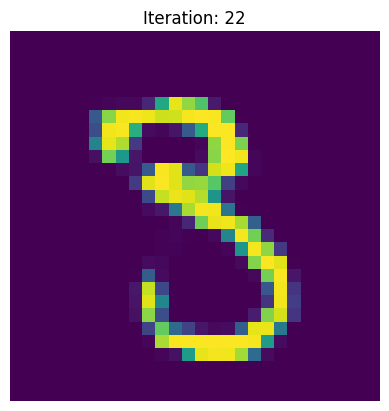

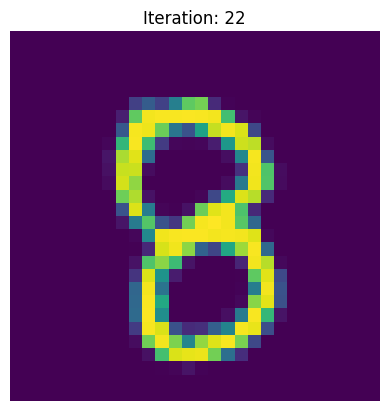

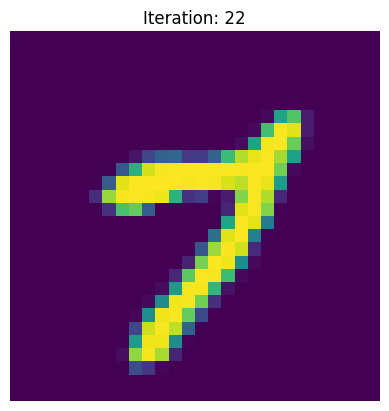

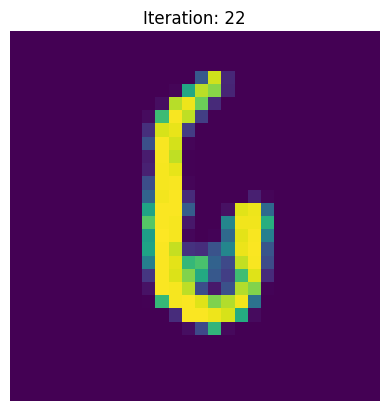

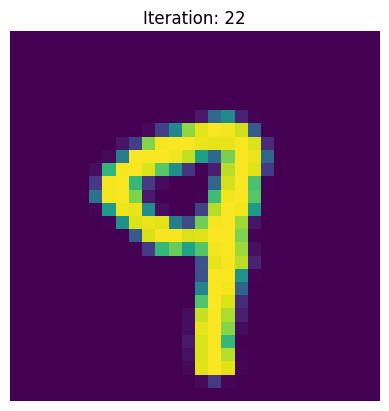

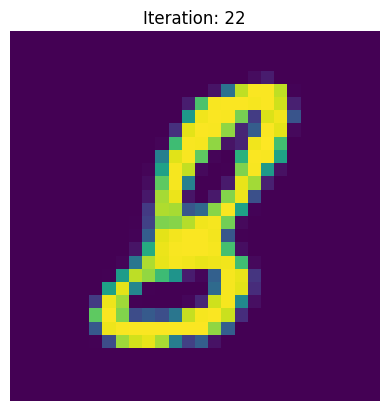

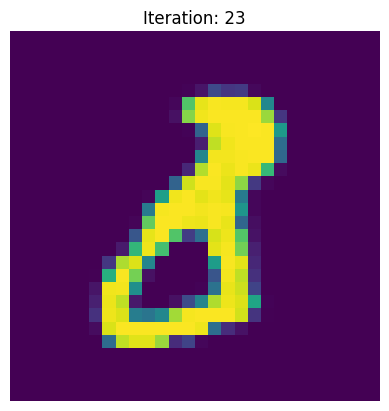

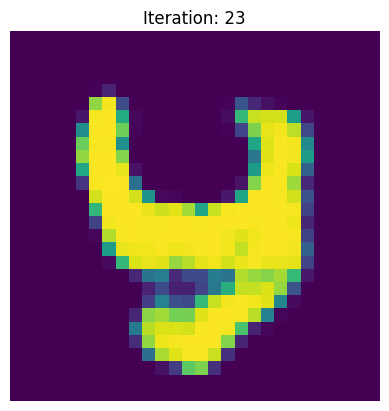

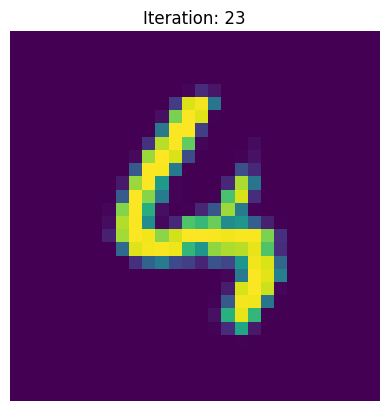

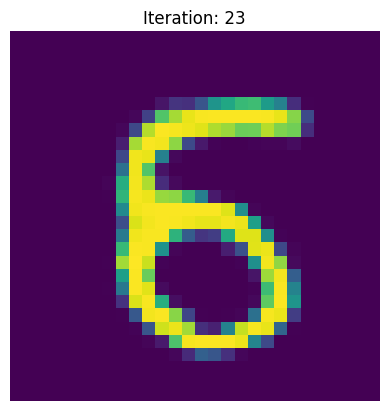

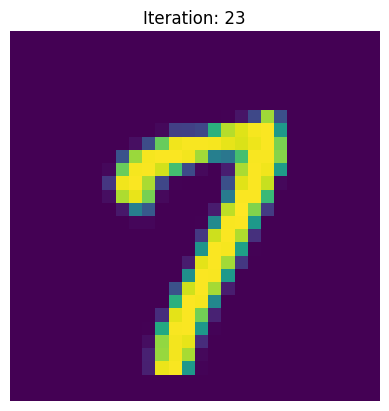

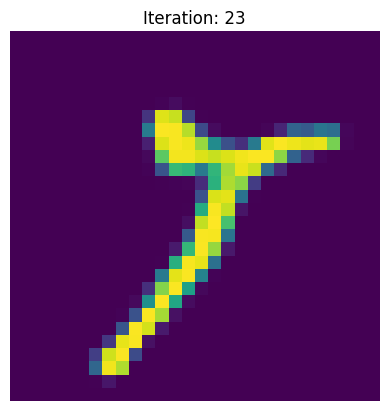

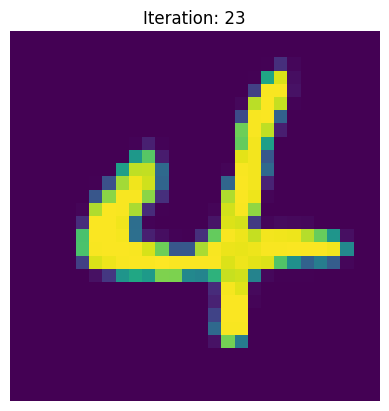

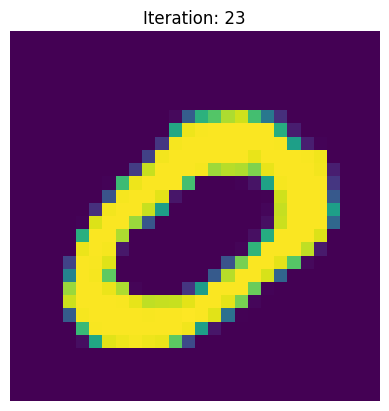

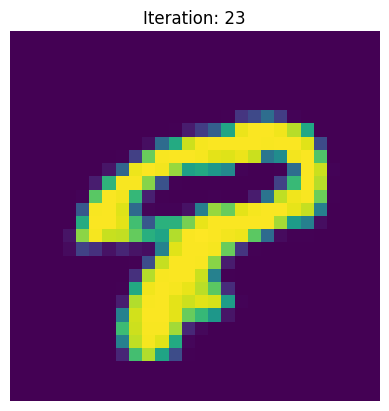

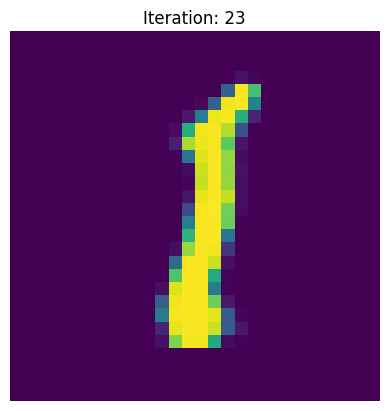

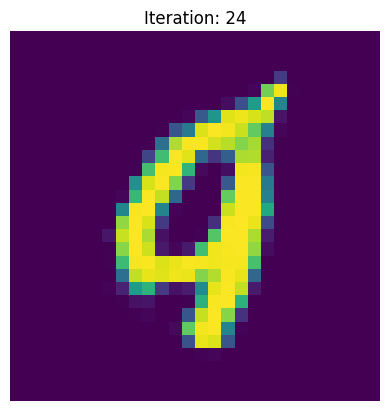

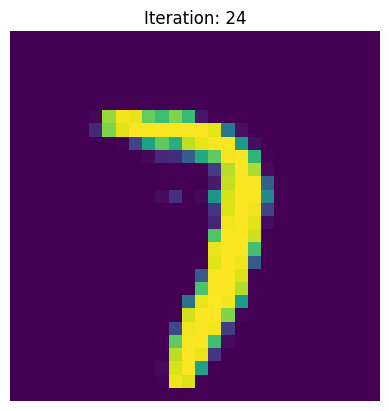

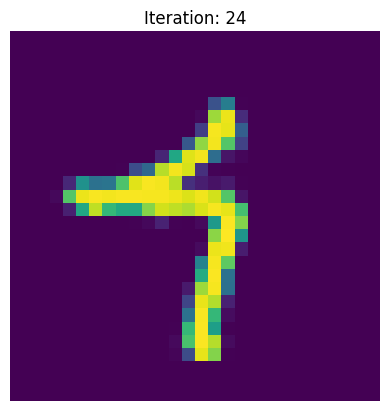

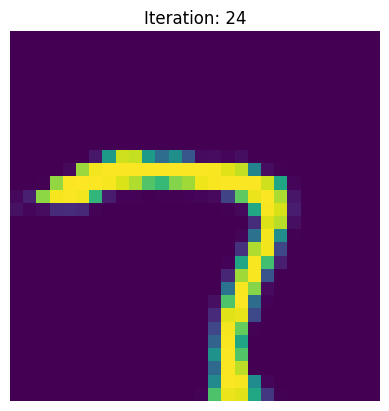

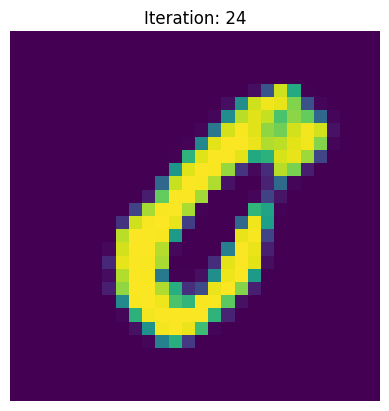

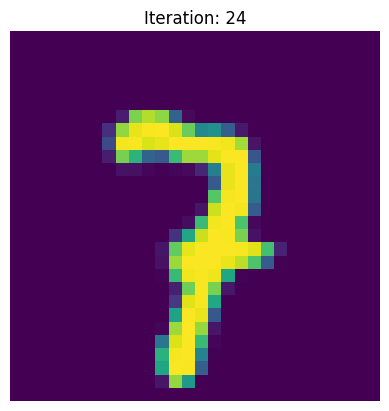

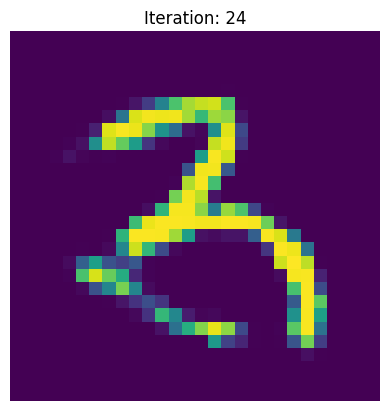

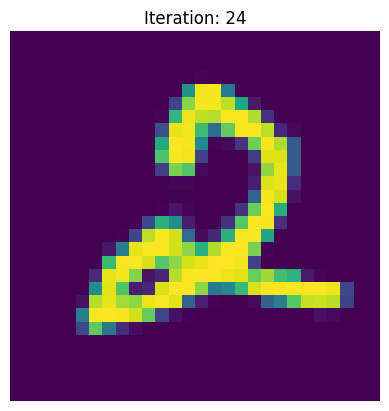

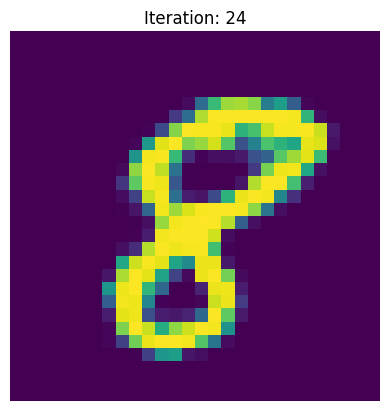

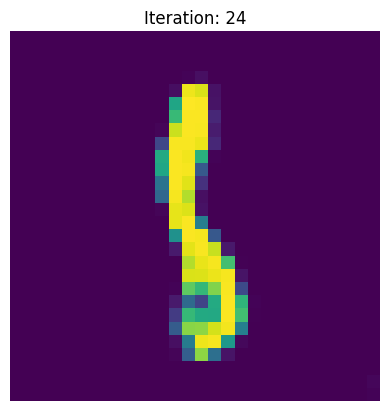

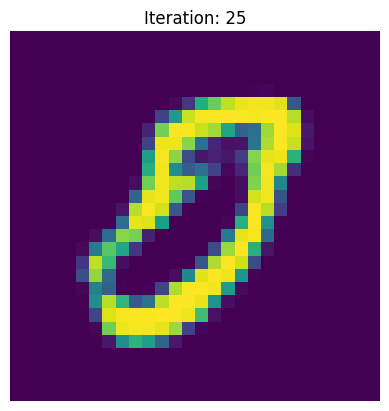

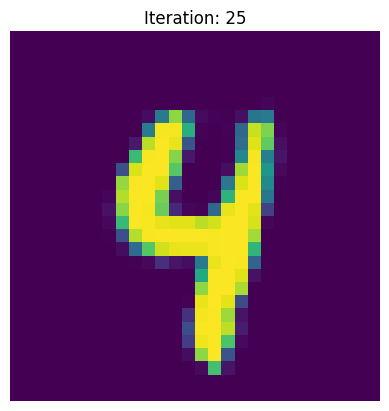

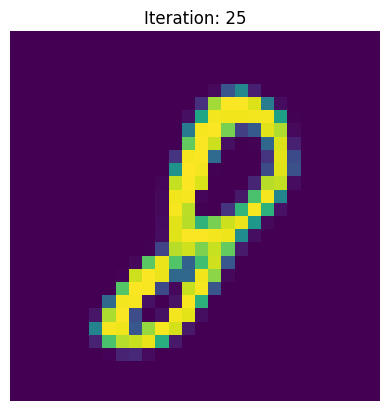

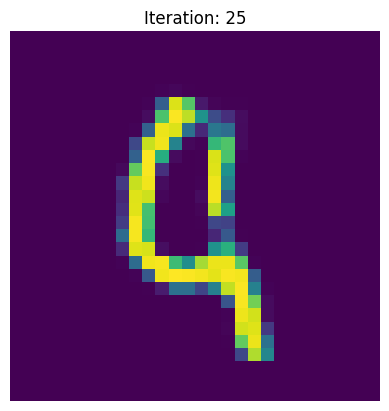

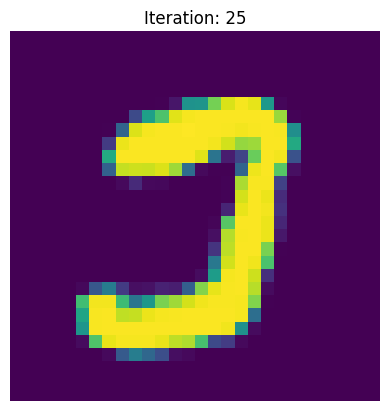

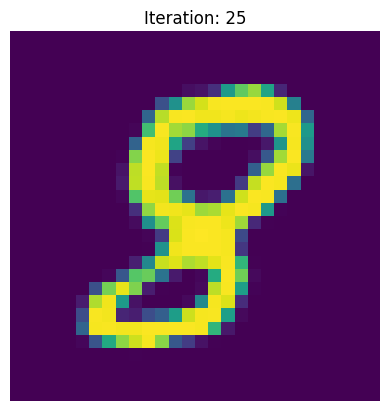

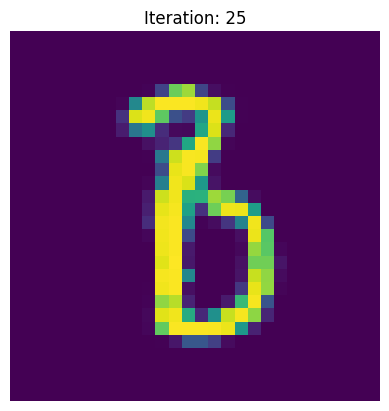

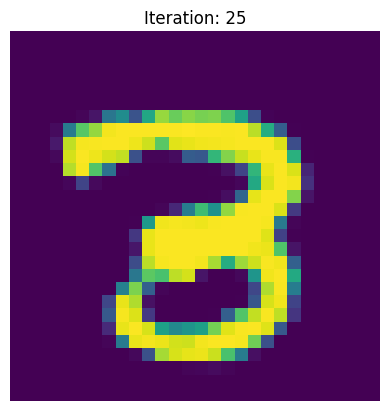

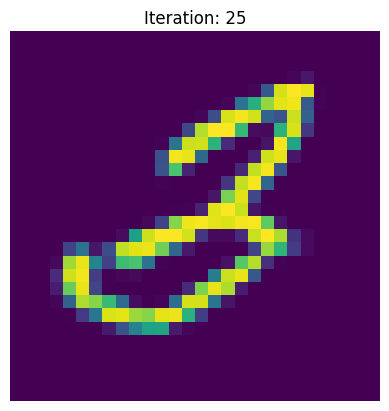

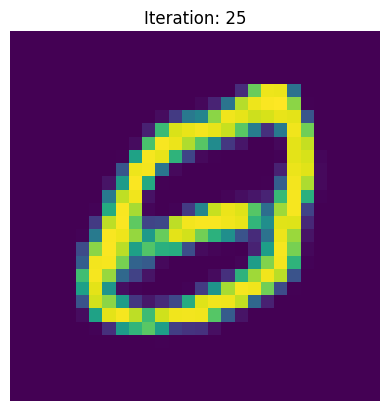

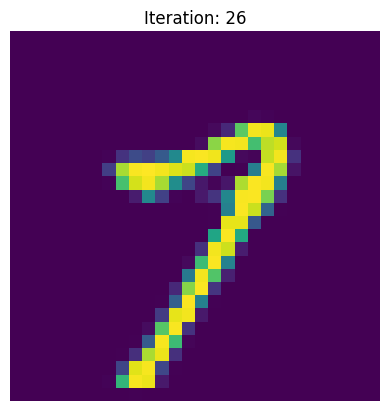

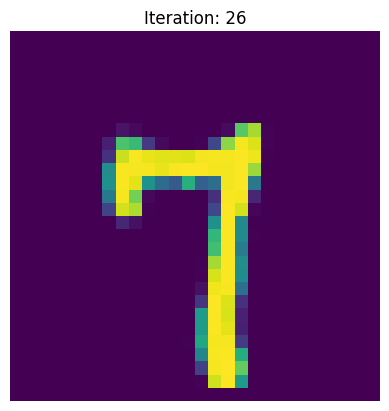

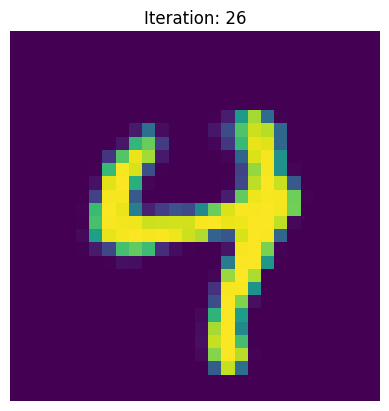

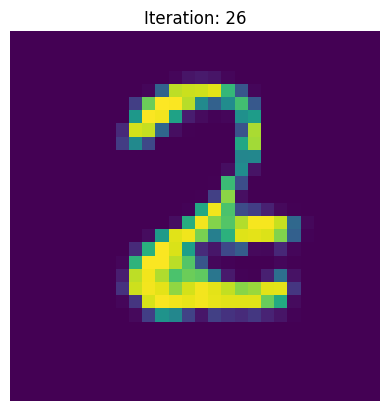

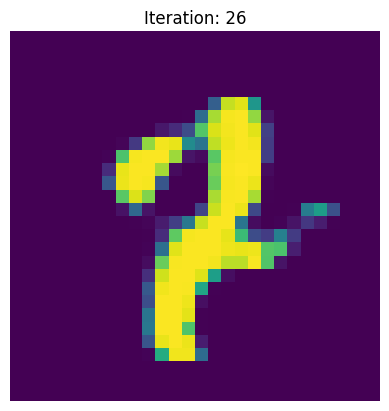

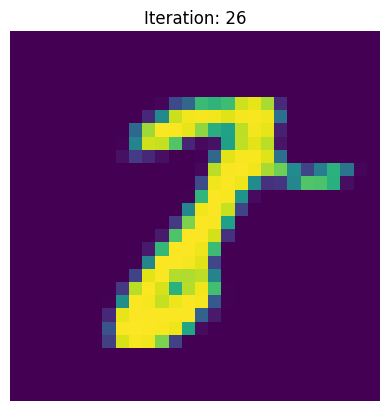

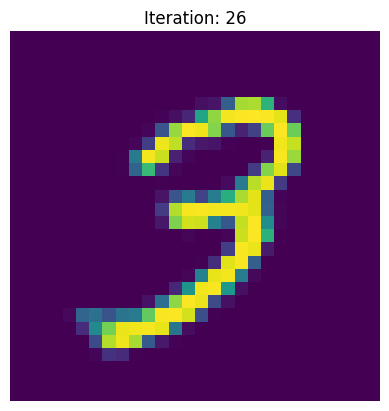

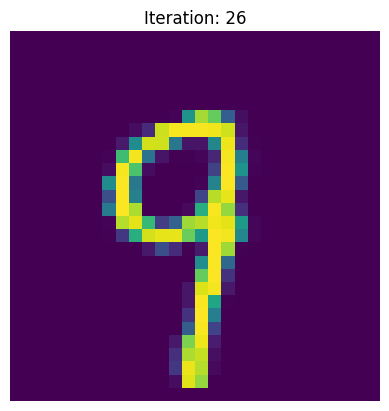

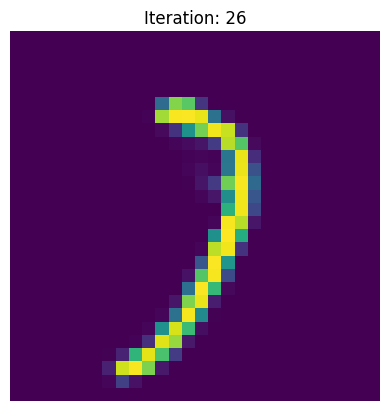

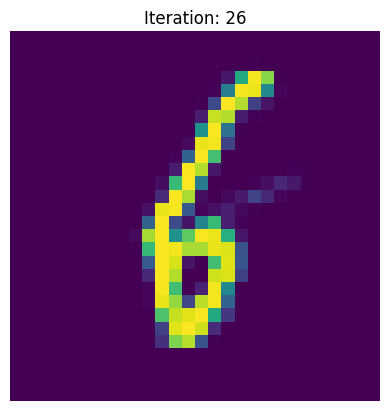

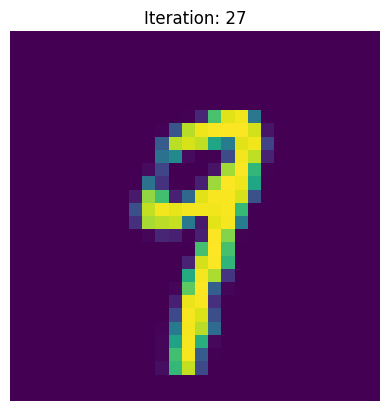

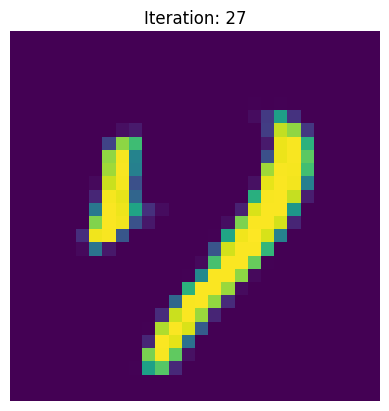

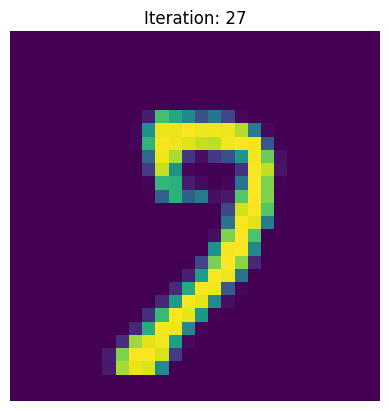

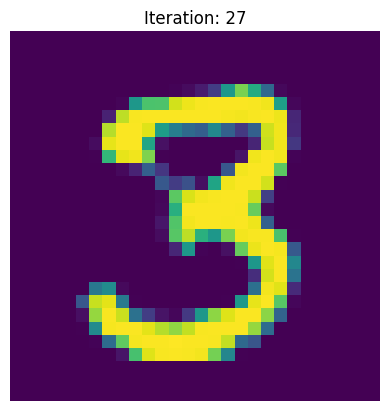

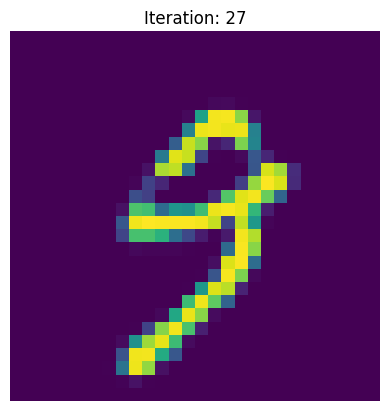

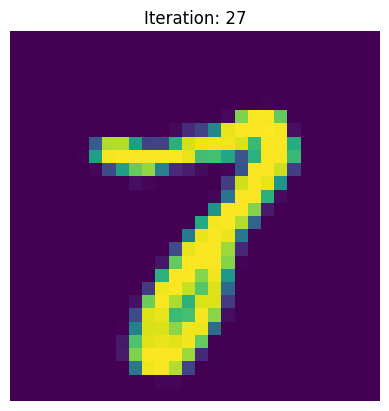

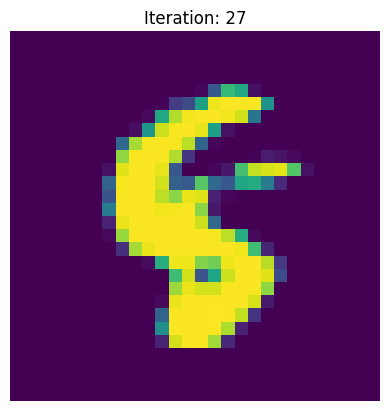

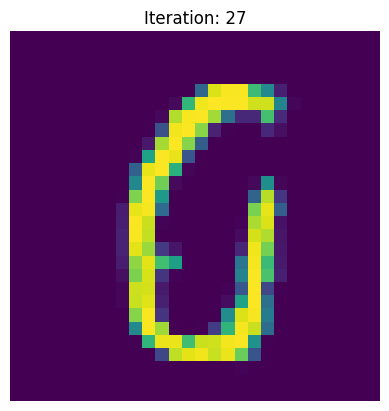

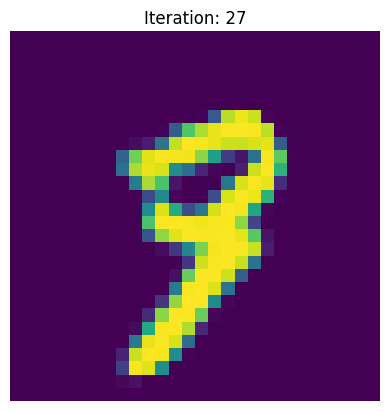

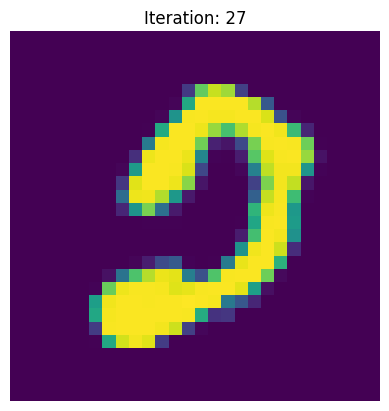

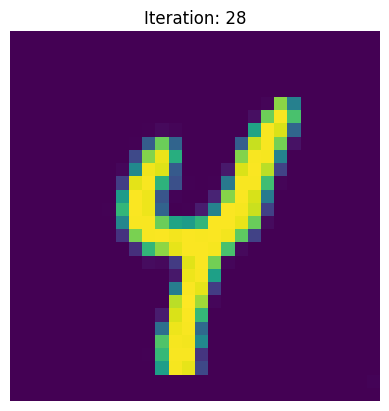

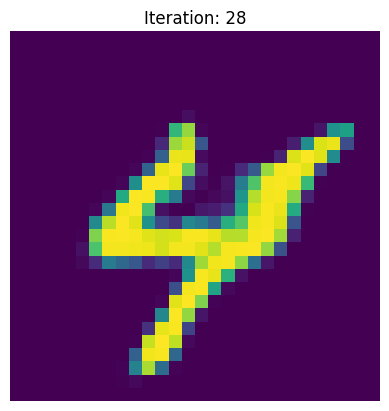

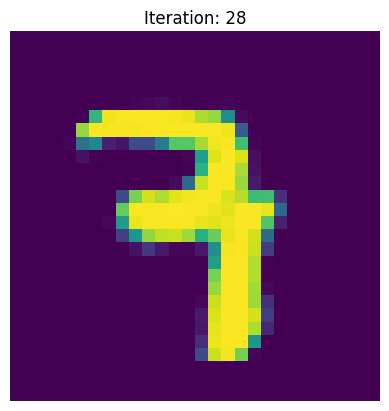

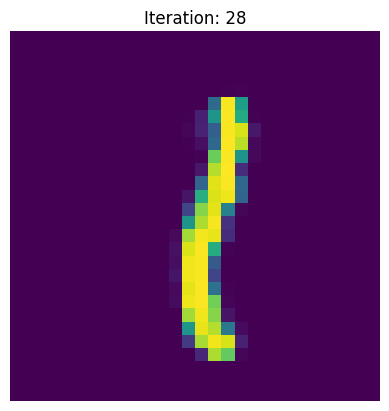

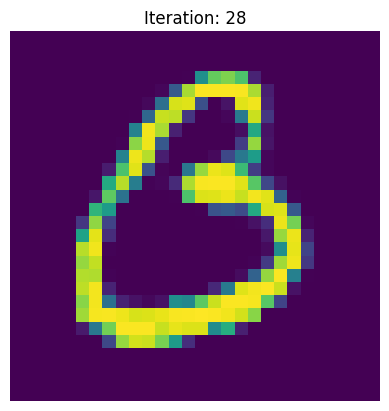

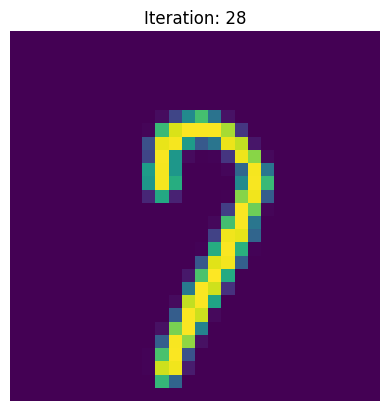

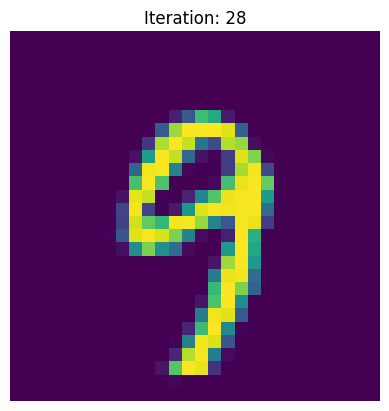

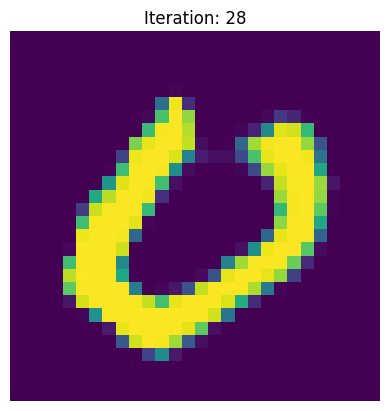

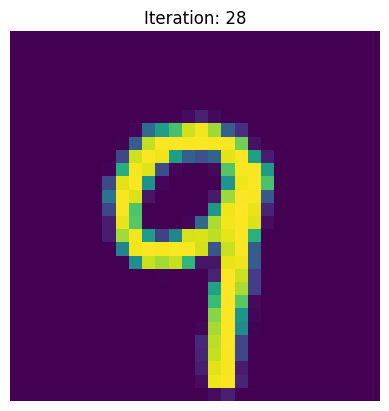

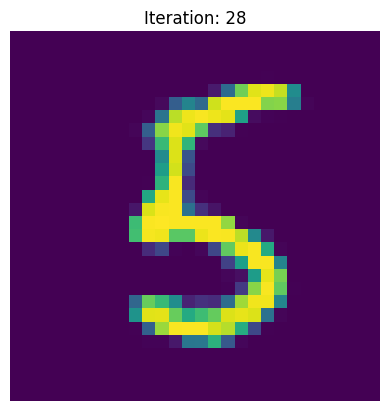

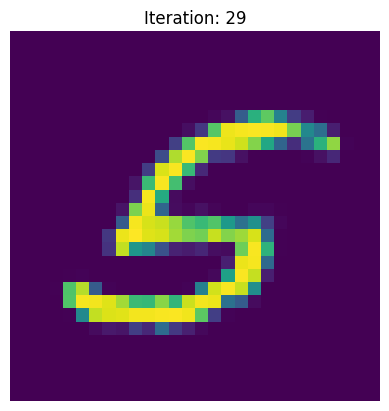

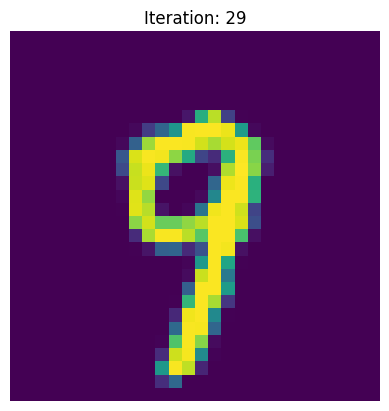

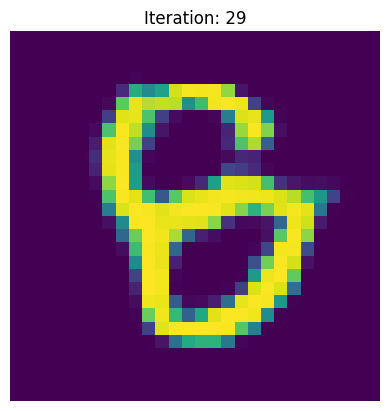

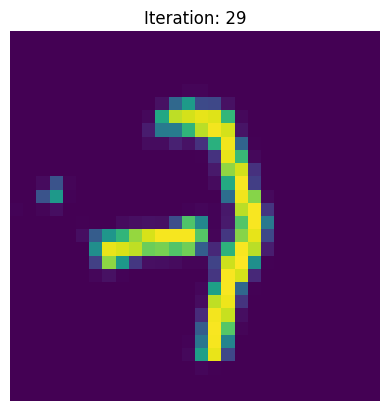

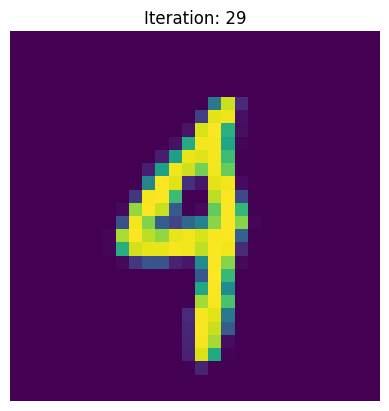

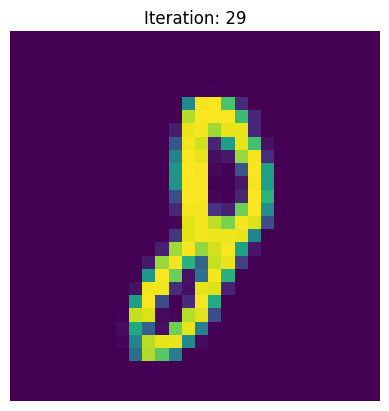

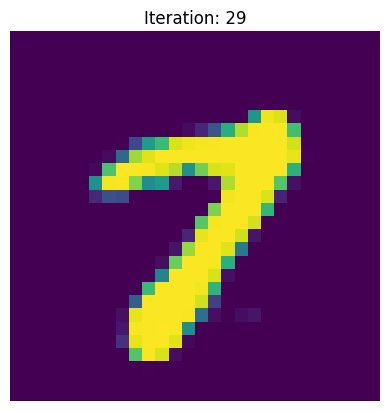

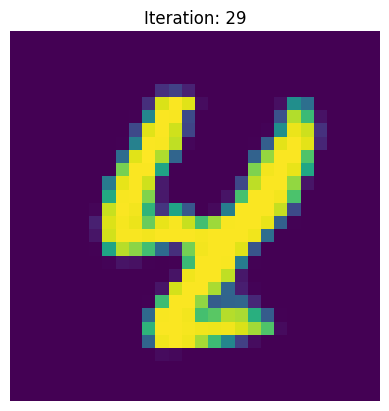

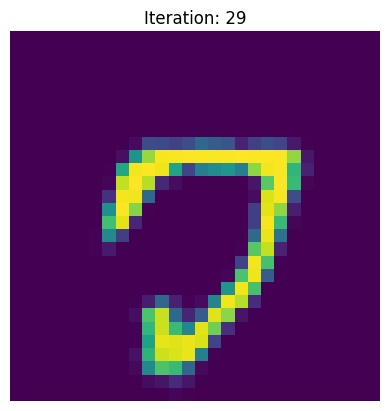

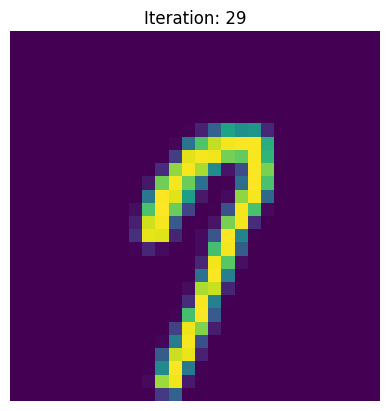

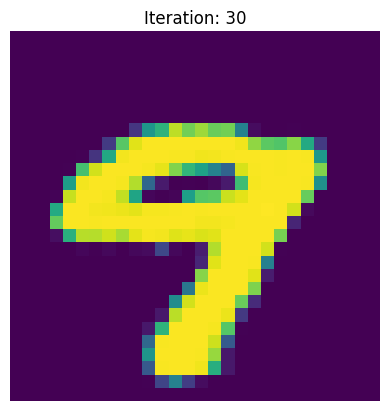

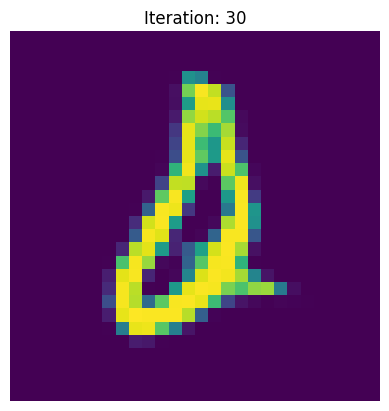

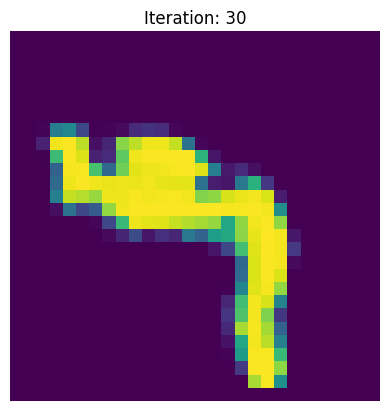

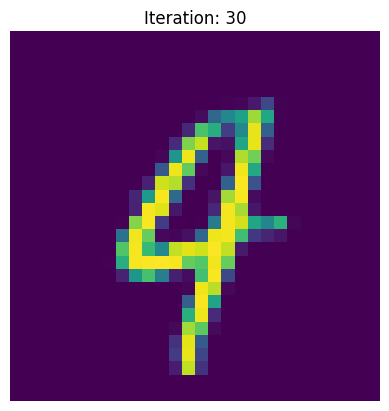

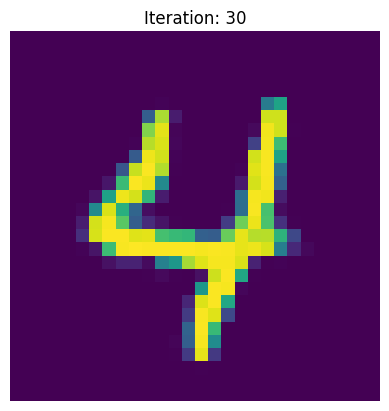

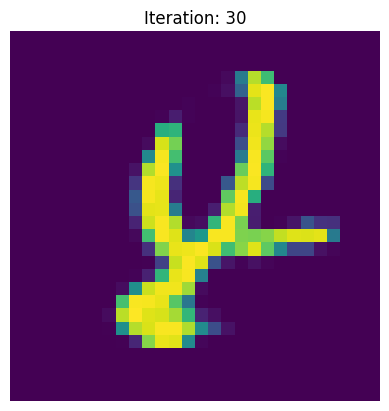

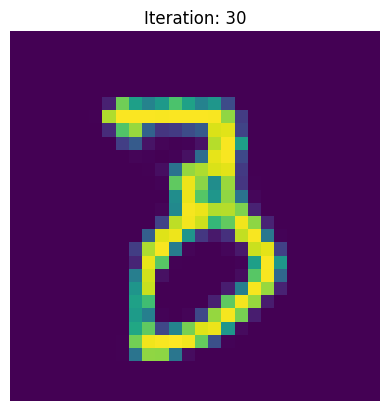

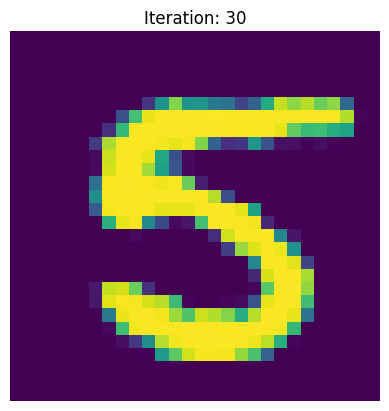

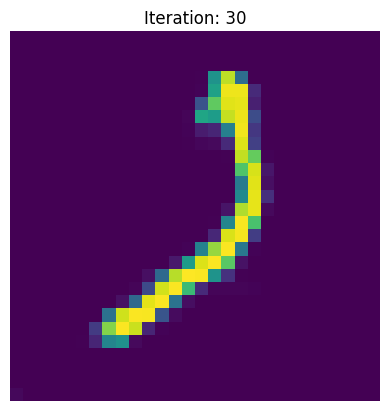

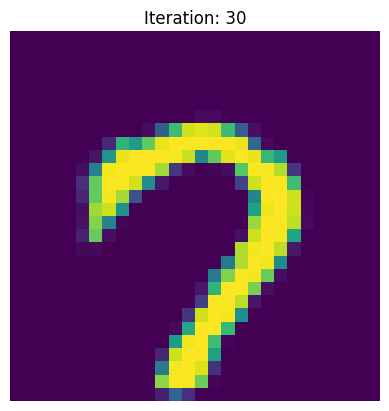

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

image_directory = '/content/'
image_files = [file for file in os.listdir(image_directory) if file.endswith('.png')]
image_files.sort(key=lambda x: int(x.split('_')[2]))

for image_file in image_files:
    image_path = os.path.join(image_directory, image_file)
    img = mpimg.imread(image_path)
    iteration = int(image_file.split('_')[2])

    plt.imshow(img)
    plt.title(f'Iteration: {iteration}')
    plt.axis('off')
    plt.show()

I set it to train for 100 epochs but stopped it at around 30 and got pretty solid results. Some of the images are not as accurate of course but overall the digits are clearly visible. Note: I should have left it as 3 images instead of generating 10 per step since there are so many images now but it paints a clear picture of how the imporvements go through each iteration.

In [ ]:
!mkdir celeba_gan
!gdown --id 1O7m1010EJjLE5QxLZiM9Fpjs7Oj6e684 -O celeba_gan/data.zip
!unzip -qq celeba_gan/data.zip -d celeba_gan

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1O7m1010EJjLE5QxLZiM9Fpjs7Oj6e684
To: /content/celeba_gan/data.zip
100% 1.44G/1.44G [00:21<00:00, 66.8MB/s]


Found 202599 files belonging to 1 classes.


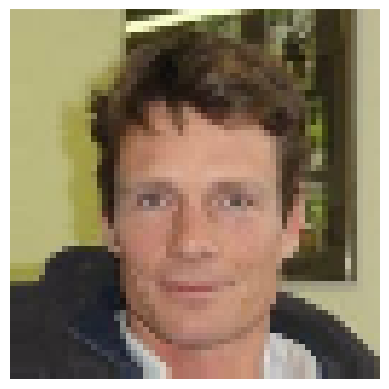

In [ ]:
dataset = keras.utils.image_dataset_from_directory(
    "celeba_gan",
    label_mode=None,
    image_size=(64, 64),
    batch_size=32,
    smart_resize=True)

dataset = dataset.map(lambda x: x / 255.)

import matplotlib.pyplot as plt
for x in dataset:
    plt.axis("off")
    plt.imshow((x.numpy() * 255).astype("int32")[0])
    break

The example in the textbook used celebrity faces as the dataset instead of MNIST so I wanted to try it with my same structure to see how it would perform as well.

In [ ]:
discriminator = keras.Sequential(
    [
        keras.Input(shape=(64,64,3)),
        layers.Conv2D(64, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(128, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(128, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Flatten(),
        layers.Dropout(0.2),
        layers.Dense(1, activation="sigmoid"),
    ],
    name="discriminator",
)

In [ ]:
latent_dim = 128

generator = keras.Sequential(
    [
        keras.Input(shape=(latent_dim,)),
        layers.Dense(8 * 8 * 128),
        layers.Reshape((8, 8, 128)),
        layers.Conv2DTranspose(128, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2DTranspose(256, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2DTranspose(512, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(3, kernel_size=5, padding="same", activation="sigmoid"),
    ],
    name="generator",
)

I left everything the same in the GAN class, only needing to update the discriminator to take in proper (64,64,3) images instead of the MNIST 28x28x1, and also changing the generator slightly by starting at 8x8 images then adding another transpose layer with 512 filters at the end to achieve 64x64 images. I could have started it 16x16 and kept the same amount of layers or even started at 4x4 images and included another transpose layer since these images are much more complex than MNIST but I only added one more since I'm using the GoogleColab gpus and don't have unlimited resources.

In [ ]:
class GANMonitor(keras.callbacks.Callback):
    def __init__(self, num_img=3, latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.normal(shape=(self.num_img, self.latent_dim))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        img = keras.utils.array_to_img(generated_images[0])
        plt.imshow(img)

Also slightly changed the callback since I tried it and saw 1 epoch would take 30 minutes and figured I wasn't saving multiple images over multiple iterations.

Epoch 1/100
6332/6332 [==============================] - 1641s 258ms/step - d_loss: 0.6024 - g_loss: 1.2673
Epoch 2/100
  81/6332 [..............................] - ETA: 26:53 - d_loss: 0.6190 - g_loss: 1.2097

KeyboardInterrupt: ignored

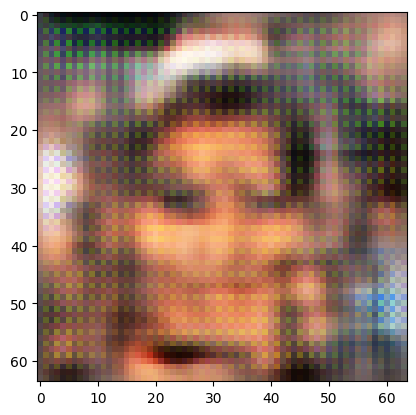

In [ ]:
epochs = 100

gan = GAN(discriminator=discriminator, generator=generator, latent_dim=latent_dim)
gan.compile(
    d_optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    g_optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss_fn=keras.losses.BinaryCrossentropy(),
)

gan.fit(
    dataset, epochs=epochs, callbacks=[GANMonitor(num_img=10, latent_dim=latent_dim)]
)

So I trained this model for 1 epoch becasue each epoch takes roughly 30 minutes on the GPU I'm using un Google Colab and obviously the results aren't very good, however it is better than I thought it would be after 1 epoch. You can clearly see the outlines of a face including where the eyes and nose and mouth generally are and hair as well. This just shows I can use this same GAN structure on more complex images if I had the proper computing resources or wanted to spend the time training it. Interesting regardless.

# Problem 6
Use a Physics-informed neural network to solve the differential equation

$f''(x) = -1$ on $[-1,1], f(-1) = f(1) = 0$

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [20]:
class PINN(keras.Model):
    def __init__(self):
        super(PINN, self).__init__()
        self.dense1 = layers.Dense(50, activation='tanh')
        self.dense2 = layers.Dense(50, activation='tanh')
        self.dense3 = layers.Dense(1, activation=None)

    def call(self, x):
        x = tf.expand_dims(x, axis=-1)
        x = self.dense1(x)
        x = self.dense2(x)
        x = self.dense3(x)
        return x

The model itself is pretty simple in structure, I did width = 50 and depth = 2 instead of the width = 20 and depth = 3 in the examply case. I felt like the increased width could help, then I started at depth = 3 but lowered it after the first attempt at training for this final structure. It is just a fully connected dense network, note I also expanded the dimenstion in the call function since it expects a batch_size,input_dim input into the network.

In [23]:
def loss_fn(model, x_interior, x_boundary):
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(x_interior)
        tape.watch(x_boundary)

        # Interior points
        u_interior = model(x_interior)
        u_interior_x = tape.gradient(u_interior, x_interior)
        u_interior_xx = tape.gradient(u_interior_x, x_interior)
        f_pred_interior = u_interior_xx + 1.0

        # Boundary points
        u_boundary_left = model(x_boundary[0])
        u_boundary_right = model(x_boundary[1])

        # Compute loss
        loss_interior = tf.reduce_mean(tf.square(f_pred_interior))
        loss_boundary = tf.reduce_mean(tf.square(u_boundary_left) + tf.square(u_boundary_right))
        loss = loss_interior + loss_boundary

    return loss

The loss function is computed as follows: first the predicted value of the interior points is computed by passing the randomly sampled x_interior points through the model, then the first derivative is computed with respect to x, and then the second derivative is computed with respect to x. Since we have $ f''(x) = - 1 \implies f''(x) + 1 = 0$. So essentially adding the 1 to the second derivative is how we incorporate $f''(x) = -1$ into the training process. Then in the loss_interior portion we just compute the mean squared difference between the predicted value of the network and the target value which is now 0 since we added the 1 in the previous part. Next the boundary points are evaluated at the boundaries to get the left and right predictions. Since the boundary condition is $f(-1) = f(1) = 0$, the boundary loss is just the mean squared difference between the predicted solutions and 0. And the total loss is these 2 loss functions added together.

In [24]:
num_interior_points = 10000
num_boundary_points = 100

x_interior = np.random.uniform(low=-1, high=1, size=(num_interior_points, 1))
x_boundary_left = np.array([[-1.0]] * num_boundary_points)
x_boundary_right = np.array([[1.0]] * num_boundary_points)

x_interior_tf = tf.convert_to_tensor(x_interior, dtype=tf.float32)
x_boundary_left_tf = tf.convert_to_tensor(x_boundary_left, dtype=tf.float32)
x_boundary_right_tf = tf.convert_to_tensor(x_boundary_right, dtype=tf.float32)

Generated 10,000 interior points and 100 points at each boundary. Note I could have done equally spaced points as in the example but I felt incorporating randomness could lead to more robust results. But I added a lot more points too just to be careful.

In [35]:
model = PINN()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

Created the model and again just left using a default choice of Adam as the optimizer.

In [36]:
for epoch in range(1000):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(model, x_interior_tf, [x_boundary_left_tf, x_boundary_right_tf])

    grads = tape.gradient(loss_value, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss_value.numpy()}")

Epoch 0, Loss: 1.1403247117996216
Epoch 100, Loss: 0.18913811445236206
Epoch 200, Loss: 0.015679767355322838
Epoch 300, Loss: 0.0006972396513447165
Epoch 400, Loss: 0.00035972020123153925
Epoch 500, Loss: 0.00025646539870649576
Epoch 600, Loss: 0.00019841452012769878
Epoch 700, Loss: 0.000158084585564211
Epoch 800, Loss: 0.00012756240903399885
Epoch 900, Loss: 0.00010350275260861963


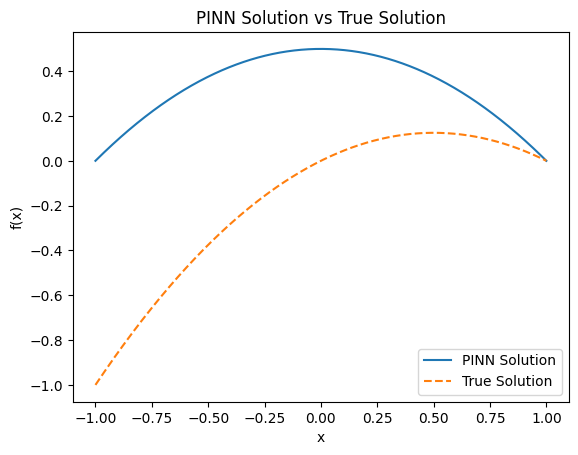

In [31]:
x_pred = np.linspace(-1, 1, 1000)
x_pred_tf = tf.convert_to_tensor(x_pred, dtype=tf.float32)
u_pred = model(x_pred_tf).numpy()
u_pred = u_pred.reshape(1000,)

plt.plot(x_pred, u_pred, label='PINN Solution')

u_true = -0.5 * x_pred**2 + 0.5*x_pred
plt.plot(x_pred, u_true, label='True Solution', linestyle='--')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('PINN Solution vs True Solution')
plt.legend()
plt.show()

So the model approximates the true solution pretty well after 1000 steps. Note: the true solution was found through integration:
<br>
$f''(x) = -1 \implies f'(x) = -x + C_1 \implies f(x) = -\frac{1}{2}x^2 + C_1x + C_2$
<br>
$f(-1) = 0 \implies -\frac{1}{2}(-1)^2 + C_1(-1) + C_2 = 0$
<br>
$f(1) = 0 \implies -\frac{1}{2}(1)^2 + C_1(1) + C_2 = 0$
<br>
$C_1 = \frac{1}{2}, C_2 = 0$